
# What happens when classes overlap? How does that affect performance? Which transformations to the feature space work best?






we will follow this plan :

1.   What is class overlap?

2. What is feature space transformation in Data Science?

3. How does class overlap influence the performance of a classification model?

4. Which transformations to the feature space work best?



*   Comparison of the four transformations over diffrent types of datasets
*    What is the dimension of Z space that works better?




5. Conclusion




In this section, we employed three classification models: Logistic Regression, Decision Tree, and Support Vector Machine (SVM) with an RBF kernel. We primarily used Logistic Regression and Decision Tree to ensure that the observed performance differences were mainly attributed to the feature transformations themselves, rather than being specific to a single model type. The SVM with an RBF kernel was used to examine the impact of a non-linear model in comparison to the linear models.

We chose accuracy to evaluate the performance of our models, as there are no issues with imbalanced data to justify an alternative metric.

let's remind quiquely what are those machie learning modeles .


### 1. Logistic Regression

**Definition:** A statistical model used for binary classification (predicting one of two outcomes). It estimates the probability of an instance belonging to a particular class using a logistic function.

**Mathematical Formula:**  
$$
P(y = 1 \mid \mathbf{x}) = \frac{1}{1 + \exp\left(-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)\right)}
$$

Where:  
- $P(y = 1 \mid \mathbf{x})$ is the probability that the target $y$ equals 1 given features $\mathbf{x}$  
- $\beta_0$ is the intercept (bias term)  
- $\beta_1, \beta_2, \dots, \beta_n$ are the model coefficients  
- $x_1, x_2, \dots, x_n$ are the feature values  




### 2. Decision Tree

**Definition:** A tree-like model that makes predictions by recursively partitioning the data based on feature values. Each internal node represents a feature, each branch represents a decision rule, and each leaf node represents a predicted class.

** Example of Mathematical Representation for (Gini Impurity for a Node):**  
$$
\text{Gini(node)} = 1 - \sum_{i=1}^{k} p_i^2
$$

Where:  
- $p_i$ is the proportion of instances belonging to class $i$ in the node  
- $k$ is the number of classes  

Decision trees aim to minimize impurity (such as Gini impurity) as they split the data.

### 3. Support Vector Machines (SVMs)

**Definition:**  
SVMs are supervised learning models used for classification and regression tasks. Their primary goal is to find the optimal hyperplane that best separates data points into different classes with the largest margin.



### Kernels in SVMs

Kernels are crucial to SVMs, especially when dealing with non-linearly separable data. They provide a way to implicitly map data into a higher-dimensional space where it might become linearly separable.



### Types of Kernels

#### 1. Linear Kernel  
**Formula:**  
$$
K(\mathbf{x}, \mathbf{x}') = \mathbf{x} \cdot \mathbf{x}'
$$  
**Usage:** Suitable for linearly separable data. It's the simplest kernel and often a good starting point.

#### 2. Polynomial Kernel  
**Formula:**  
$$
K(\mathbf{x}, \mathbf{x}') = (\gamma \, \mathbf{x} \cdot \mathbf{x}' + r)^d
$$  
**Usage:** Creates a non-linear decision boundary by considering polynomial combinations of features. Parameters $\gamma$, $r$, and $d$ control its behavior.

#### 3. Radial Basis Function (RBF) Kernel  
**Formula:**  
$$
K(\mathbf{x}, \mathbf{x}') = \exp(-\gamma \|\mathbf{x} - \mathbf{x}'\|^2)
$$  
**Usage:** One of the most popular kernels. It creates a non-linear decision boundary by measuring the similarity between data points based on their distance. The parameter $\gamma$ controls the width of the kernel.

#### 4. Sigmoid Kernel  
**Formula:**  
$$
K(\mathbf{x}, \mathbf{x}') = \tanh(\gamma \, \mathbf{x} \cdot \mathbf{x}' + r)
$$  
**Usage:** Less commonly used compared to RBF. It can be used for tasks like image classification. Parameters $\gamma$ and $r$ influence its behavior.



### How to Choose a Kernel

- **Linear Kernel:** If your data is linearly separable or you have a large number of features.
- **RBF Kernel:** A good default choice for most non-linear problems. Experiment with the $\gamma$ parameter.
- **Polynomial Kernel:** When you believe there are polynomial relationships between features.
- **Sigmoid Kernel:** Less commonly used, explore it if other kernels don't perform well.



### Key Considerations

- **Hyperparameter Tuning:** Kernel parameters ($\gamma$, $r$, $d$) significantly affect SVM performance and need careful tuning using techniques like grid search or cross-validation.

 the parameter γ (gamma) controls the influence of each training example. A low gamma means that points far apart can still affect each other, leading to smoother, more generalized decision boundaries. In contrast, a high gamma creates tight boundaries around individual data points, which can lead to overfitting. The parameter C is a regularization term that balances the trade-off between achieving low training error and maintaining a simple decision boundary. A high C value tries to perfectly classify the training data (risking overfitting), while a low C allows more classification errors, promoting better generalization. Together, C and γ shape the complexity and performance of the SVM model.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Set seed for reproducibility
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_approximation import RBFSampler
from matplotlib.colors import ListedColormap


from sklearn.pipeline import Pipeline



## 1- What is class overlap ?

In [ ]:
def example_overlap():
    """
    Generates and displays an example of two overlapping classes using
    multivariate normal distributions.
    """
    # Set seed for reproducibility
    np.random.seed(2023)

    # Number of samples
    N = 250

    # Generate multivariate normal distributions
    mean = [0, 0]
    cov_0 = [[1, 0.9], [0.9, 1]]  # Positive correlation
    cov_1 = [[1, -0.9], [-0.9, 1]]  # Negative correlation

    X0 = np.random.multivariate_normal(mean, cov_0, N)
    X1 = np.random.multivariate_normal(mean, cov_1, N)

    # Create dataframes
    df0 = pd.DataFrame({'x1': X0[:, 0], 'x2': X0[:, 1], 'y': 'class 0'})
    df1 = pd.DataFrame({'x1': X1[:, 0], 'x2': X1[:, 1], 'y': 'class 1'})

    # Combine datasets
    df = pd.concat([df0, df1])

    # Plot
    sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette='coolwarm')
    plt.title("Example of Two Classes that overlap")
    plt.show()

In [ ]:
example_overlap

<function __main__.example_overlap()>

#### Definition :
Class overlapping occurs when samples from different classes share similar feature values, making it difficult for a classifier to separate them correctly.

Let's take a look at the example below:

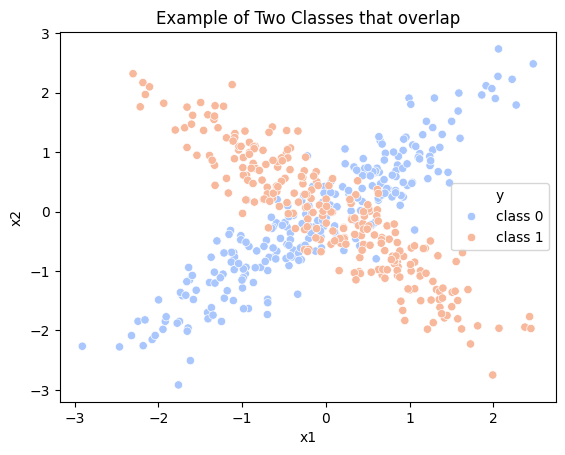

In [ ]:
example_overlap()

The upper left and lower right regions are clearly dominated by class 1, while the upper right and lower left regions are clearly dominated by class 2. **However, the points in the middle are not clearly classified—this is overlapping.**

##2- what is features space transformation in Data science ?

In data science, feature space transformation involves altering the representation of data features (variables or input dimensions). This is often done to uncover hidden patterns, enhance model performance, or meet the requirements of specific algorithms.

Techniques for Feature Space Transformation:

Feature space transformation encompasses a variety of techniques, including:



*   **Mathematical Transformations**: Applying mathematical functions like logarithms,square roots, or standardization to features can improve data distribution and model performance.

*   **Dimensionality Reduction**: Techniques like Principal Component Analysis (PCA) and t-SNE reduce the number of features while preserving important information, simplifying the dataset and potentially improving model efficiency.


*   **Encoding Categorical Variables**: Converting categorical variables into numerical representations using methods like one-hot encoding or label encoding allows algorithms to effectively process them.

*   **Feature Engineering**: Creating new features from existing ones, such as interaction terms or polynomial features, can capture complex relationships within the data and improve model accuracy.


*   **Kernel Transformations**: Used in algorithms like Support Vector Machines (SVMs), kernel transformations project data into higher-dimensional spaces to enhance separability between classes.



Mathematicaly,

Consider an original data point represented as a vector:

Let a feature vector be:

$$ \mathbf{x} \in X $$

where \( X \) represents the input feature space.

A transformation is a function that maps the original feature space \( X \) to a new feature space, denoted as \( Z \):

$$ \phi: X \rightarrow Z $$

It transforms the original vector into a new vector in the \( Z \) space:

$$ \phi(\mathbf{x}) = \mathbf{z} \in Z $$

where \( \mathbf{z} \) represents the transformed feature vector in the \( Z \) space.





In this work, we will focus on kernel transformations, dimensionality reduction with PCA, and standardization.

## 3- How does class overlap influence the performance of a classification model?


We will create four similar datasets (in terms of distribution) but with four different degrees of overlap. We will then train a classification model on each dataset and compare its performance across the datasets.


In [ ]:
def datasets_levels():
    """
    Generates and plots datasets with different levels of class overlap.

    Returns:
        dict: A dictionary where keys are 'overlap_{level}' and values
              are tuples (X, y) representing the data and labels.
    """


    # Number of samples per class
    N = 100

    # Define different levels of overlap
    overlap_levels = [0, 30, 70, 100]
    data_arrays = {}

    # Create subplots
    fig, axes = plt.subplots(1, len(overlap_levels), figsize=(20, 4))

    for i, overlap in enumerate(overlap_levels):
        # Generate uniform distributions with increasing overlap
        X1 = np.random.uniform(0, 100, (N, 2))
        X2 = np.random.uniform(0 + (100 - overlap), 100 + (100 - overlap), (N, 2))

        # Create labels
        y1 = np.zeros(N)  # Class 1
        y2 = np.ones(N)   # Class 2

        # Combine the datasets and labels
        X = np.vstack((X1, X2))
        y = np.concatenate((y1, y2))

        # Store arrays
        data_arrays[f'overlap_{overlap}'] = (X, y)

        # Plot
        ax = axes[i]
        ax.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 1', alpha=0.6)
        ax.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 2', alpha=0.6)
        ax.set_title(f'Overlap Level: {overlap}%')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

    return data_arrays, overlap_levels


In [ ]:
# 5. Function to visualize the decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):

    plt.figure(figsize=(10, 6))

    # Define the grid limits
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on the entire grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot the points
    for label in np.unique(y):
        mask = (y == label)
        plt.scatter(X[mask, 0], X[mask, 1], label=f'Class {int(label)}', alpha=0.6)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [ ]:
def evaluate_overlap_levels_linear(data_arrays, overlap_levels):
    """
    Evaluates the performance of a linear svm  model across different overlap levels.
    """
    results = {
        "overlap_level": [],
        "validation_accuracy": [],
        "test_accuracy": [],
        "train_accuracy": [],
    }

    for overlap in overlap_levels:
        print(f"\n--- Overlap {overlap}% ---")

        # Get X and y from data_arrays
        X, y = data_arrays[f'overlap_{overlap}']

        # Step 1: Split into train/val/test sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.1, random_state=42, stratify=y
        )
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )

        # Define the parameter grid
        param_grid = {
            'C': [0.1, 1, 10, 100],  # Regularization parameter

        }

        # Create an SVM with RBF kernel
        model_bt = SVC(kernel='linear')

        # Create a GridSearchCV object
        grid_search = GridSearchCV(model_bt, param_grid, cv=5, scoring='accuracy')

        # Fit the grid search to your training data
        grid_search.fit(X_train, y_train)

        # Get the best hyperparameters
        best_params = grid_search.best_params_
        print("Best Hyperparameters:", best_params)

        # Get the best estimator
        model= grid_search.best_estimator_



        # Step 3: Evaluate the model
        results["overlap_level"].append(overlap)
        results["validation_accuracy"].append(accuracy_score(y_val, model.predict(X_val)))
        results["test_accuracy"].append(accuracy_score(y_test, model.predict(X_test)))
        results["train_accuracy"].append(accuracy_score(y_train, model.predict(X_train)))

        # Step 4: Visualize decision boundary
        #plot_decision_boundary(X, y, model, title=f"SVM Decision Boundary - Overlap {overlap}%")

    # Plotting the results
    results_df = pd.DataFrame(results)
    plt.plot(results_df["overlap_level"], results_df["validation_accuracy"], label="Validation Accuracy")
    plt.plot(results_df["overlap_level"], results_df["test_accuracy"], label="Test Accuracy")
    plt.plot(results_df["overlap_level"], results_df["train_accuracy"], label="Train Accuracy")
    plt.xlabel("Overlap Level (%)")
    plt.ylabel("Accuracy")
    plt.title("Validation and Test Accuracy per Overlap Level")
    plt.legend()
    plt.show()

    # Create a pandas DataFrame from the results
    results_df = pd.DataFrame(results)

    # Apply styling
    styled_table = results_df.style.set_properties(**{
        'background-color': 'grey',
        'color': 'black',
        'border-color': 'black'
    })

    # Display the styled table
    display(styled_table)

In [ ]:
def evaluate_overlap_levels_rbf(data_arrays, overlap_levels):
    """
    Evaluates the performance of rbf svm model across different overlap levels.
    """
    results = {
        "overlap_level": [],
        "validation_accuracy": [],
        "test_accuracy": [],
        "train_accuracy": [],
    }

    for overlap in overlap_levels:
        print(f"\n--- Overlap {overlap}% ---")

        # Get X and y from data_arrays
        X, y = data_arrays[f'overlap_{overlap}']

        # Step 1: Split into train/val/test sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.1, random_state=42, stratify=y
        )
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )

        # Define the parameter grid
        param_grid = {
            'C': [0.1, 1, 10, 100],  # Regularization parameter
            'gamma': [0.01, 0.1, 1, 10],  # Kernel coefficient
        }

        # Create an SVM with RBF kernel
        model_bt = SVC(kernel='rbf')

        # Create a GridSearchCV object
        grid_search = GridSearchCV(model_bt, param_grid, cv=5, scoring='accuracy')

        # Fit the grid search to your training data
        grid_search.fit(X_train, y_train)

        # Get the best hyperparameters
        best_params = grid_search.best_params_
        print("Best Hyperparameters:", best_params)

        # Get the best estimator
        model= grid_search.best_estimator_



        # Step 3: Evaluate the model
        results["overlap_level"].append(overlap)
        results["validation_accuracy"].append(accuracy_score(y_val, model.predict(X_val)))
        results["test_accuracy"].append(accuracy_score(y_test, model.predict(X_test)))
        results["train_accuracy"].append(accuracy_score(y_train, model.predict(X_train)))

        # Step 4: Visualize decision boundary
        #plot_decision_boundary(X, y, model, title=f"SVM Decision Boundary - Overlap {overlap}%")

    # Plotting the results
    results_df = pd.DataFrame(results)
    plt.plot(results_df["overlap_level"], results_df["validation_accuracy"], label="Validation Accuracy")
    plt.plot(results_df["overlap_level"], results_df["test_accuracy"], label="Test Accuracy")
    plt.plot(results_df["overlap_level"], results_df["train_accuracy"], label="Train Accuracy")
    plt.xlabel("Overlap Level (%)")
    plt.ylabel("Accuracy")
    plt.title("Validation and Test Accuracy per Overlap Level")
    plt.legend()
    plt.show()

    # Create a pandas DataFrame from the results
    results_df = pd.DataFrame(results)

    # Apply styling
    styled_table = results_df.style.set_properties(**{
        'background-color': 'lightblue',
        'color': 'black',
        'border-color': 'black'
    })

    # Display the styled table
    display(styled_table)



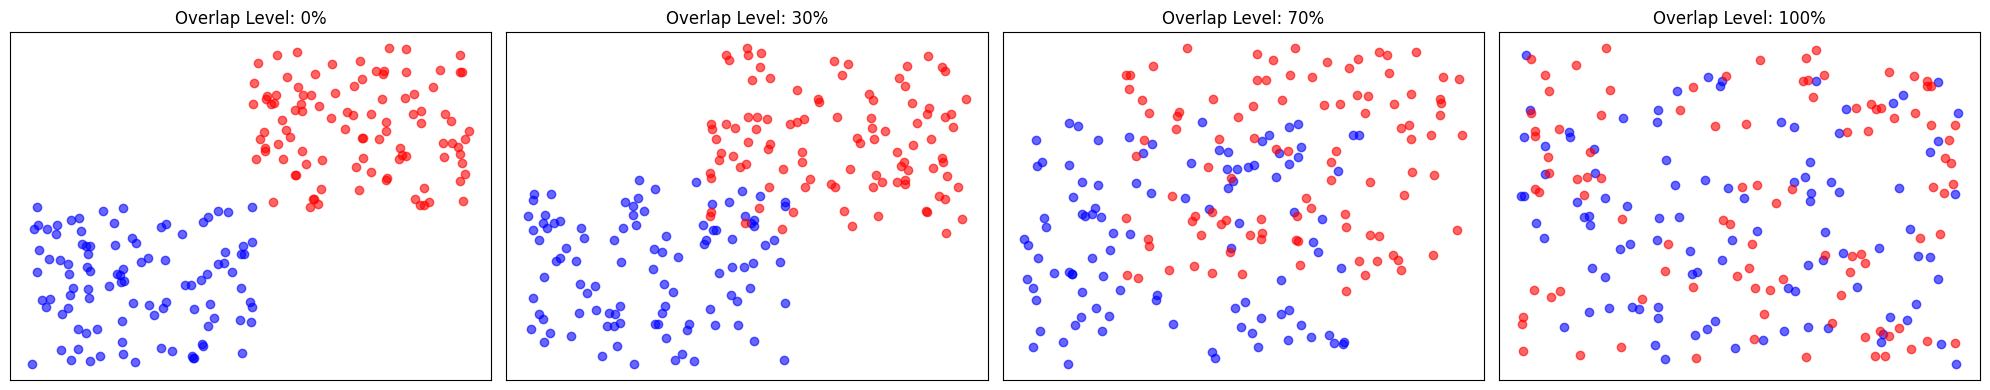

In [ ]:
data_arrays, overlap_levels = datasets_levels()

The visualizations of the three datasets illustrate a clear trend: as the level of overlap between classes increases, the region of the graph containing both colors (representing both classes) expands. This indicates that higher overlap levels lead to a greater degree of mixing between the classes, making them more difficult to distinguish.

Let's attempt classification using a **linear Support Vector Machine** (SVM) on all the generated datasets and analyze the accuracy variations.


--- Overlap 0% ---
Best Hyperparameters: {'C': 0.1}

--- Overlap 30% ---
Best Hyperparameters: {'C': 0.1}

--- Overlap 70% ---
Best Hyperparameters: {'C': 10}

--- Overlap 100% ---
Best Hyperparameters: {'C': 100}


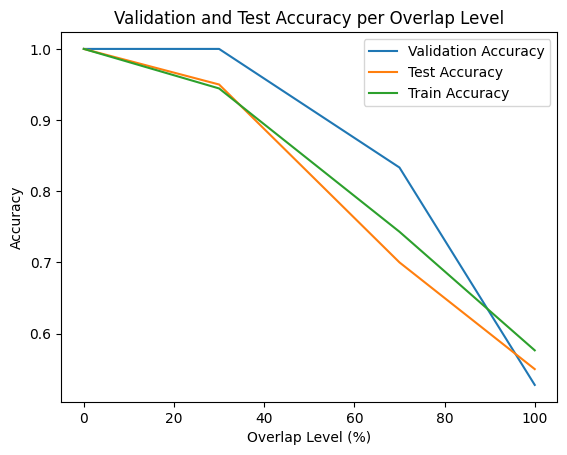

,overlap_level,validation_accuracy,test_accuracy,train_accuracy
0,0,1.000000,1.000000,1.000000
1,30,1.000000,0.950000,0.944444
2,70,0.833333,0.700000,0.743056
3,100,0.527778,0.550000,0.576389


In [ ]:
evaluate_overlap_levels_linear(data_arrays, overlap_levels)

It's clear that the higher the level of overlap, the lower the accuracy score becomes.

**Note that** : Since our classes are balanced, accuracy is an appropriate metric in this case, and it's the one we will use for this work.

Some of you might be wondering if the poor performance is solely due to using a linear model, e**specially since our data may not be linearly separable.** You might be thinking that other models could yield better results. That's a great question, and I had the same thought.




To address this, let's examine how an SVM with an RBF kernel performs on these datasets.


--- Overlap 0% ---
Best Hyperparameters: {'C': 1, 'gamma': 0.01}

--- Overlap 30% ---
Best Hyperparameters: {'C': 10, 'gamma': 0.01}

--- Overlap 70% ---
Best Hyperparameters: {'C': 1, 'gamma': 0.01}

--- Overlap 100% ---
Best Hyperparameters: {'C': 10, 'gamma': 0.1}


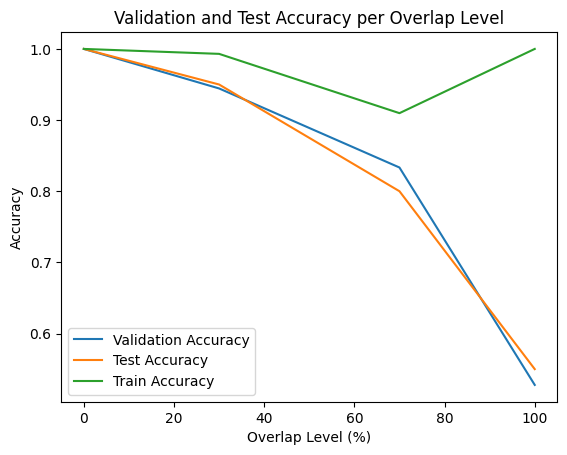

,overlap_level,validation_accuracy,test_accuracy,train_accuracy
0,0,1.000000,1.000000,1.000000
1,30,0.944444,0.950000,0.993056
2,70,0.833333,0.800000,0.909722
3,100,0.527778,0.550000,1.000000


In [ ]:
evaluate_overlap_levels_rbf(data_arrays, overlap_levels)

We observe a clear phenomenon of overfitting here, even with hyperparameter tuning where we selected the smallest possible value for C. A smaller C prioritizes a wider margin and is more tolerant of misclassifications. Despite this and using a non-linear kernel, the training accuracy remains high, while the validation and test accuracies stay relatively low. Interestingly, these validation and test accuracies show only slight improvement compared to the linear kernel but are still considerably better than those achieved by the linear model

###Conclusion_1:
Class Overlap Impacts Accuracy: As the level of overlap between classes increases, the accuracy of classification models (both linear and non-linear) decreases.

## 4- which transformations to the feature space work best

In this part, we will evaluate the performance of two distinct classification models, Logistic Regression and Decision Tree, across four different feature space transformations.

**By employing two different models, we aim to ensure that the observed performance differences are primarily attributed to the feature transformations themselves, rather than being biased by the specific characteristics of a single model.**

**Note that all models were hyperparameter-tuned to mitigate overfitting and ensure a fair comparison.**

The transformations are:

1.   Standardization
2.   Principal Component Analysis (PCA)
3. RBF Kernel Transformation (mapping to a higher-dimensional space)
4. Combination of PCA and RBF Kernel Transformation




If you're wondering why we've chosen only the RBF transformation to study the performance in a higher-dimensional space, the section titled '4-1- What is the dimension of Z space that works better?' will address this question.



  


**Now, let's delve into the mathematical foundations of these transformations.**

### 1. Standardization

Standardization is a preprocessing technique that centers the data around zero and scales it to have unit variance. This is crucial for many machine learning algorithms, including logistic regression, as it prevents features with larger ranges from dominating the model and ensures that all features contribute equally.

**Mathematically, standardization involves:**

- **Centering:** Subtract the mean ($\mu$) of the feature from each data point:  
  $$x' = x - \mu$$

- **Scaling:** Divide the centered data point by the standard deviation ($\sigma$) of the feature:  
  $$z = \frac{x'}{\sigma}$$

The resulting standardized feature $z$ has a mean of 0 and a standard deviation of 1.

---

### 2. Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that finds a lower-dimensional representation of the data while preserving as much variance as possible. It does this by identifying **principal components**, which are orthogonal directions in the feature space that capture the maximum variance.

**Steps involved in PCA:**

- **Covariance Matrix:** Compute the covariance matrix of the standardized data to understand feature relationships.
- **Eigen Decomposition:** Perform eigen decomposition on the covariance matrix to obtain eigenvectors (principal components) and eigenvalues (variance explained by each component).
- **Projection:** Project the original data onto the top principal components by multiplying the data matrix by the matrix of eigenvectors.

---

### 3. RBF Kernel Transformation

The Radial Basis Function (RBF) kernel is a non-linear mapping that projects data into a higher-dimensional space.

**The RBF kernel is defined as:**

$$
K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
$$

Where:
- $x$ and $x'$ are data points,
- $\|x - x'\|$ is the Euclidean distance between them,
- $\sigma$ is a parameter that controls the width of the kernel.

Applying this kernel to all pairs of data points creates a new feature space where the data may become linearly separable.

In the case of the RBF kernel, the transformation maps the data into an infinite-dimensional space, which cannot be explicitly constructed. Therefore, instead of Logistic Regression, or decision tree classifier, I used SVC from scikit-learn:

```python
SVC(kernel='rbf')
```

SVC is well-suited for this setting, as it leverages the kernel trick to operate in the transformed space without explicitly computing the mapping. This allows us to evaluate the power of the RBF transformation by analyzing how well SVC separates the classes. While we can't apply Logistic Regression directly in this infinite space, SVC effectively finds the optimal separating hyperplane, making it a reliable substitute for studying the effect of the transformation.

### 4. Combination of PCA and RBF

Combining PCA with the RBF kernel leverages both dimensionality reduction and non-linear transformation. The process involves:

we will use

```
KernelPCA()
```

Kernel Principal Component Analysis (KernelPCA) is an extension of the standard Principal Component Analysis (PCA) technique that enables nonlinear dimensionality reduction by leveraging kernel methods. While traditional PCA identifies linear combinations of features to capture the maximum variance in the data, KernelPCA allows for capturing complex, nonlinear structures by implicitly mapping the data into a higher-dimensional feature space using a kernel function.
the coordinate system will be centered, rescaled on each component with respected to its variance and finally be rotated.

KernelPCA performs a linear PCA, which corresponds to a nonlinear transformation in the original input space. This approach is particularly beneficial when the data exhibits nonlinear relationships that linear PCA cannot capture effectively.


Lets see wich transformation work the best on data that have 50% of overlap, 5 features , but only 2 are informative .


In [ ]:

def simulate_data_1(mean=10, std=5):
    """
    Simulates a dataset with overlapping classes using make_classification,
    and applies a linear transformation to change its mean and standard deviation.

    Args:
        mean (float): Desired mean of the features.
        std (float): Desired standard deviation of the features.

    Returns:
        tuple: A tuple containing the feature matrix (X) and the target vector (y).
    """
    X, y = make_classification(n_samples=500, n_features=5, n_informative=2,
                               n_redundant=0, n_clusters_per_class=1,
                               class_sep=0.5, random_state=42)

    # Apply transformation
    X = X * std + mean

    # Plot only first two features
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.5)
    plt.title("Overlapping Classes – Data 1")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    return X, y


In [ ]:
simulate_data_1

<function __main__.simulate_data_1(mean=5, std=2)>

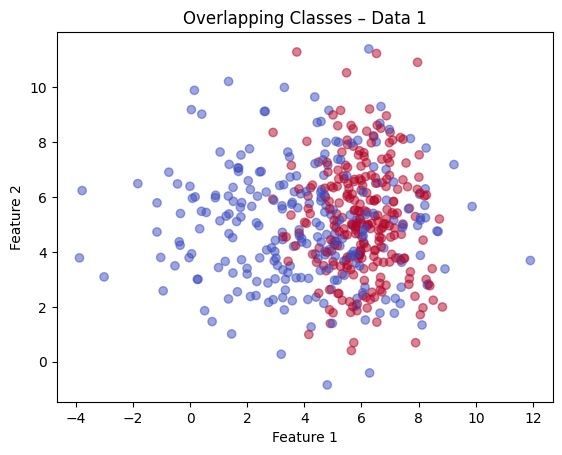

In [ ]:
X,y = simulate_data_1(5,2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, ax, title):
    """
    Plots the decision boundary of a model for a dataset with more than two features.

    Args:
        X (array-like): The feature matrix.
        y (array-like): The target vector.
        model: The trained classification model.
        ax (matplotlib.axes.Axes): The axes to plot on.
        title (str): The title of the plot.
    """
    # Consider only the first two features for plotting and prediction
    X_plot = X[:, :2]

    h = .02
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Create grid with all features if the original data has more than 2
    if X.shape[1] > 2:
        grid_features = np.zeros((xx.ravel().shape[0], X.shape[1]))
        grid_features[:, :2] = np.c_[xx.ravel(), yy.ravel()]  # Use the first 2 features for grid
    else:
        grid_features = np.c_[xx.ravel(), yy.ravel()]

    # Predict on the grid
    Z = model.predict(grid_features)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

In [ ]:

def tune_and_fit_decision_tree(X_train, y_train, X_val, y_val):




    param_grid = {
        'max_depth': [2, 3, 4, 5, None],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 3]
    }
    best_model = None
    best_val_acc = 0
    best_params = None

    for max_depth in param_grid['max_depth']:
        for min_split in param_grid['min_samples_split']:
            for min_leaf in param_grid['min_samples_leaf']:
                clf = DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_split,
                    min_samples_leaf=min_leaf,
                    random_state=42
                )
                clf.fit(X_train, y_train)
                val_acc = accuracy_score(y_val, clf.predict(X_val))
                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    best_model = clf
                    best_params = clf.get_params()

    print("Best Hyperparameters:", best_params)


    return best_model, best_params


def run_pipeline_tree(X, y, dataset_name):

    """
    This function tunes and fits a Decision Tree classifier to the provided data using the function tune_and_fit_decision_tree ,
    applying it to each data transformation separately. It then evaluates the models
    performance using the accuracy score, visualizes the decision boundaries,
    and presents the accuracy scores for each transformation.

    """
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    results = {}

    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_val_norm = scaler.transform(X_val)
    X_test_norm = scaler.transform(X_test)

    # --- Raw Data ---
    clf_raw, params_raw = tune_and_fit_decision_tree(X_train, y_train, X_val, y_val)
    results["raw"] = {
        "train": accuracy_score(y_train, clf_raw.predict(X_train)),
        "val": accuracy_score(y_val, clf_raw.predict(X_val)),
        "test": accuracy_score(y_test, clf_raw.predict(X_test))
    }

    # --- Normalized Data ---
    clf_norm, params_norm = tune_and_fit_decision_tree(X_train_norm, y_train, X_val_norm, y_val)
    results["normalized"] = {
        "train": accuracy_score(y_train, clf_norm.predict(X_train_norm)),
        "val": accuracy_score(y_val, clf_norm.predict(X_val_norm)),
        "test": accuracy_score(y_test, clf_norm.predict(X_test_norm))
    }

    # --- PCA ---
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_norm)
    X_val_pca = pca.transform(X_val_norm)
    X_test_pca = pca.transform(X_test_norm)

    clf_pca, params_pca = tune_and_fit_decision_tree(X_train_pca, y_train, X_val_pca, y_val)
    results["pca"] = {
        "train": accuracy_score(y_train, clf_pca.predict(X_train_pca)),
        "val": accuracy_score(y_val, clf_pca.predict(X_val_pca)),
        "test": accuracy_score(y_test, clf_pca.predict(X_test_pca))
    }

    # --- Kernel PCA ---
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.5)
    X_train_kpca = kpca.fit_transform(X_train_norm)
    X_val_kpca = kpca.transform(X_val_norm)
    X_test_kpca = kpca.transform(X_test_norm)

    clf_kpca, params_kpca = tune_and_fit_decision_tree(X_train_kpca, y_train, X_val_kpca, y_val)
    results["kernel_pca"] = {
        "train": accuracy_score(y_train, clf_kpca.predict(X_train_kpca)),
        "val": accuracy_score(y_val, clf_kpca.predict(X_val_kpca)),
        "test": accuracy_score(y_test, clf_kpca.predict(X_test_kpca))
    }

    # --- RBF Kernel
    clf_rbf = SVC(kernel='rbf', gamma=0.5)
    clf_rbf.fit(X_train_norm, y_train)
    results["rbf_kernel"] = {
        "train": accuracy_score(y_train, clf_rbf.predict(X_train_norm)),
        "val": accuracy_score(y_val, clf_rbf.predict(X_val_norm)),
        "test": accuracy_score(y_test, clf_rbf.predict(X_test_norm))
    }

    # --- Plot decision boundaries ---
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plot_decision_boundary(X_val_pca, y_val, clf_pca, axs[0, 0], f"{dataset_name} - PCA")
    plot_decision_boundary(X_val_kpca, y_val, clf_kpca, axs[0, 1], f"{dataset_name} - Kernel PCA")
    plot_decision_boundary(X_val_norm, y_val, clf_rbf, axs[1, 0], f"{dataset_name} - RBF Kernel")
    plot_decision_boundary(X_val_norm, y_val, clf_norm, axs[1, 1], f"{dataset_name} - Normalized")
    plt.tight_layout()
    plt.show()

    # --- Plot accuracies ---
    methods = list(results.keys())
    train_scores = [results[m]["train"] for m in methods]
    val_scores = [results[m]["val"] for m in methods]
    test_scores = [results[m]["test"] for m in methods]

    x = np.arange(len(methods))
    width = 0.25
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x - width, train_scores, width, label="Train")
    ax.bar(x, val_scores, width, label="Validation")
    ax.bar(x + width, test_scores, width, label="Test")
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Accuracy Comparison - {dataset_name}")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # --- Results table ---
    results_df = pd.DataFrame(results)
    styled_table = results_df.style.set_properties(**{
        'background-color': 'lightblue',
        'color': 'black',
        'border-color': 'black'
    })

    display(styled_table)





In [ ]:

def run_pipeline_logistic(X, y, dataset_name):

    """
    This function tunes and fits a logistic regression classifier to the provided data,
    applying it to each data transformation separately. It then evaluates the models
    performance using the accuracy score, visualizes the decision boundaries,
    and presents the accuracy scores for each transformation.

    """
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    results = {}

    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_val_norm = scaler.transform(X_val)
    X_test_norm = scaler.transform(X_test)

    # Logistic Regression Hyperparameter tuning function
    def tune_logreg(X_train, y_train, X_val, y_val):
        param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}
        logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
        logreg.fit(X_train, y_train)
        best_logreg = logreg.best_estimator_

        return best_logreg

    # Raw
    clf_raw = tune_logreg(X_train, y_train, X_val, y_val)
    results["raw"] = {
        "train": accuracy_score(y_train, clf_raw.predict(X_train)),
        "val": accuracy_score(y_val, clf_raw.predict(X_val)),
        "test": accuracy_score(y_test, clf_raw.predict(X_test))
    }

    # Normalized
    clf_norm = tune_logreg(X_train_norm, y_train, X_val_norm, y_val)
    results["normalized"] = {
        "train": accuracy_score(y_train, clf_norm.predict(X_train_norm)),
        "val": accuracy_score(y_val, clf_norm.predict(X_val_norm)),
        "test": accuracy_score(y_test, clf_norm.predict(X_test_norm))
    }

    # PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_norm)
    X_val_pca = pca.transform(X_val_norm)
    X_test_pca = pca.transform(X_test_norm)

    clf_pca = tune_logreg(X_train_pca, y_train, X_val_pca, y_val)
    results["pca"] = {
        "train": accuracy_score(y_train, clf_pca.predict(X_train_pca)),
        "val": accuracy_score(y_val, clf_pca.predict(X_val_pca)),
        "test": accuracy_score(y_test, clf_pca.predict(X_test_pca))
    }

    # Kernel PCA
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.5)
    X_train_kpca = kpca.fit_transform(X_train_norm)
    X_val_kpca = kpca.transform(X_val_norm)
    X_test_kpca = kpca.transform(X_test_norm)

    clf_kpca = tune_logreg(X_train_kpca, y_train, X_val_kpca, y_val)
    results["kernel_pca"] = {
        "train": accuracy_score(y_train, clf_kpca.predict(X_train_kpca)),
        "val": accuracy_score(y_val, clf_kpca.predict(X_val_kpca)),
        "test": accuracy_score(y_test, clf_kpca.predict(X_test_kpca))
    }

    # RBF Kernel SVM
    clf_rbf = SVC(kernel='rbf', gamma=0.5)
    clf_rbf.fit(X_train_norm, y_train)
    results["rbf_kernel"] = {
        "train": accuracy_score(y_train, clf_rbf.predict(X_train_norm)),
        "val": accuracy_score(y_val, clf_rbf.predict(X_val_norm)),
        "test": accuracy_score(y_test, clf_rbf.predict(X_test_norm))
    }


    # --- Plot decision boundaries ---
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plot_decision_boundary(X_val_pca, y_val, clf_pca, axs[0, 0], f"{dataset_name} - PCA")
    plot_decision_boundary(X_val_kpca, y_val, clf_kpca, axs[0, 1], f"{dataset_name} - Kernel PCA")
    plot_decision_boundary(X_val_norm, y_val, clf_rbf, axs[1, 0], f"{dataset_name} - RBF Kernel")
    plot_decision_boundary(X_val_norm, y_val, clf_norm, axs[1, 1], f"{dataset_name} - Normalized")
    plt.tight_layout()
    plt.show()

    # Plot accuracy scores
    methods = list(results.keys())
    train_scores = [results[m]["train"] for m in methods]
    val_scores = [results[m]["val"] for m in methods]
    test_scores = [results[m]["test"] for m in methods]

    x = np.arange(len(methods))
    width = 0.25
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x - width, train_scores, width, label="Train")
    ax.bar(x, val_scores, width, label="Validation")
    ax.bar(x + width, test_scores, width, label="Test")

    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Accuracy Comparison - {dataset_name}")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Create a pandas DataFrame from the results
    results_df = pd.DataFrame(results)

    # Apply styling
    styled_table = results_df.style.set_properties(**{
        'background-color': 'lightblue',
        'color': 'black',
        'border-color': 'black'
    })

    # Display the styled table
    display(styled_table)





In [ ]:
plot_decision_boundary

<function __main__.plot_decision_boundary(X, y, model, ax, title)>

In [ ]:
run_pipeline_logistic

<function __main__.run_pipeline_logistic(X, y, dataset_name)>

In [ ]:
run_pipeline_tree

<function __main__.run_pipeline_tree(X, y, dataset_name)>

In the previous code blocks, we established a pipeline to process the given dataset. This pipeline involves splitting the data into training, validation, and test sets. Subsequently, we apply four transformations to each set:

Standardization
Principal Component Analysis (PCA)
Kernel PCA (RBF Kernel)
RBF Kernel
For each transformation, we train the corresponding model and tune its hyperparameters separately. We repeat this workflow for both Logistic Regression and Decision Tree classifiers.

Now, let's delve into the results!

1- decision tree classifier

Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Hyperparameters: {'ccp_alpha': 0.0, 'c

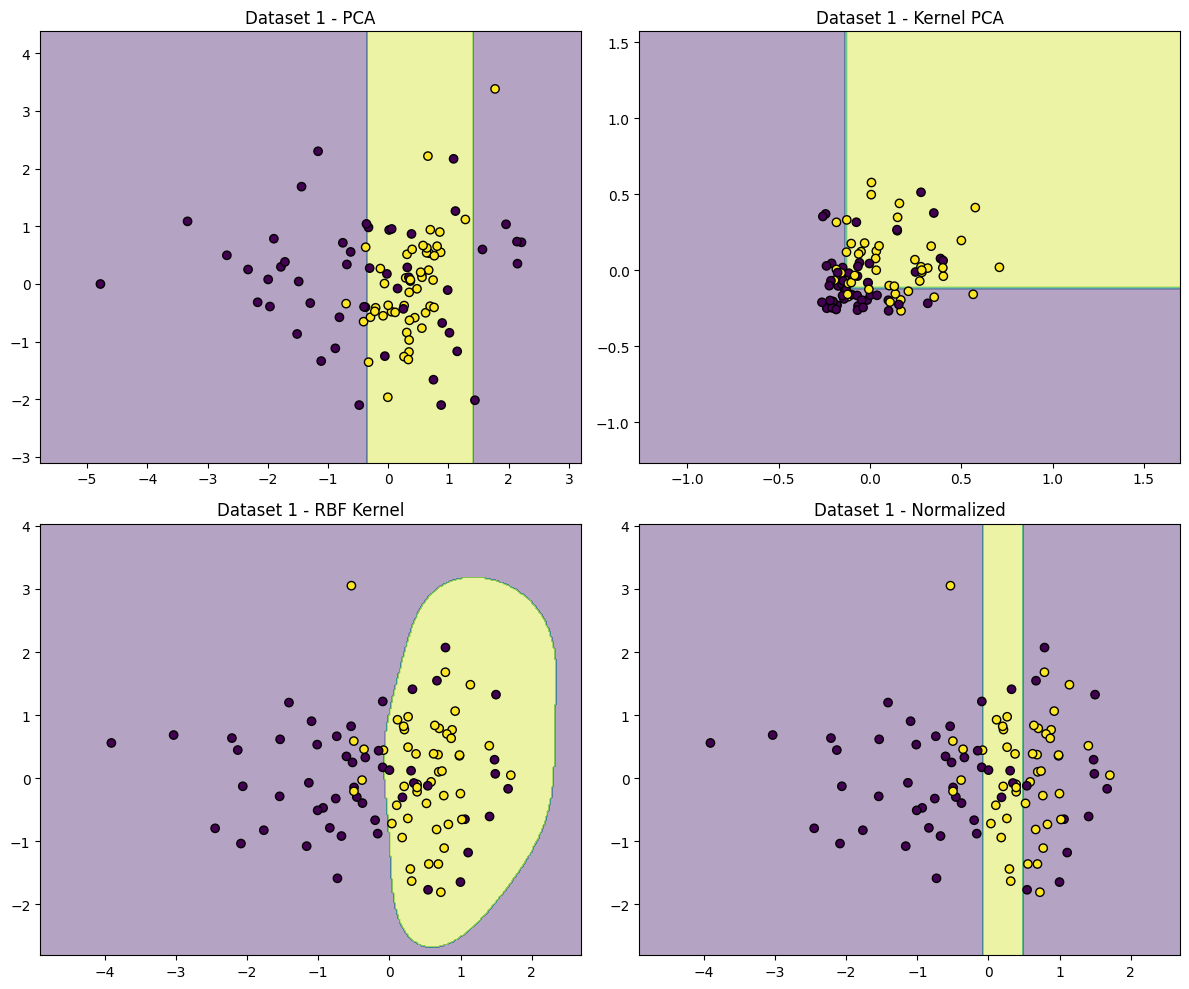

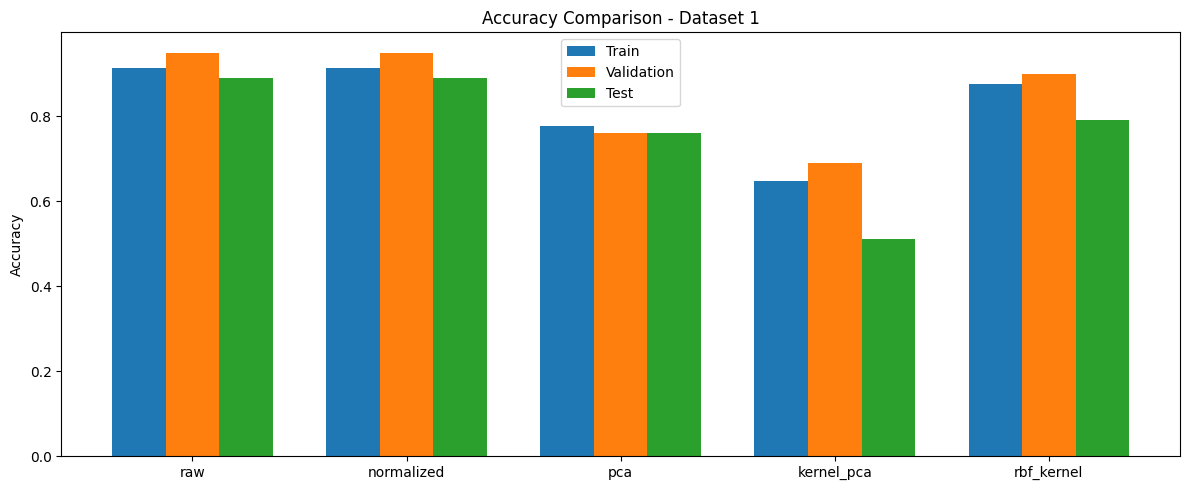

,raw,normalized,pca,kernel_pca,rbf_kernel
train,0.913333,0.913333,0.776667,0.646667,0.876667
val,0.950000,0.950000,0.760000,0.690000,0.900000
test,0.890000,0.890000,0.760000,0.510000,0.790000


In [ ]:
run_pipeline_tree(X, y, "Dataset 1")

2-logistic regression

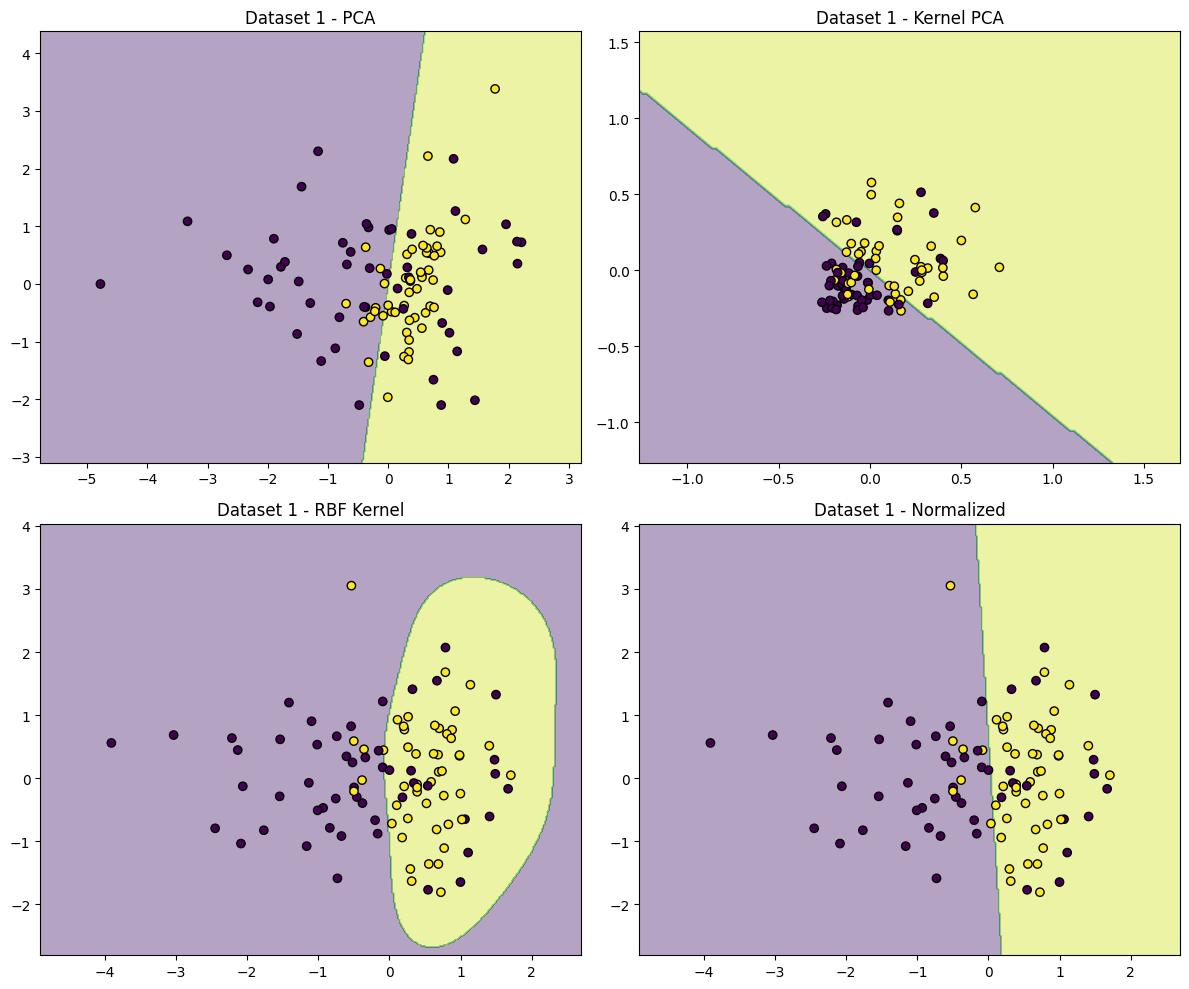

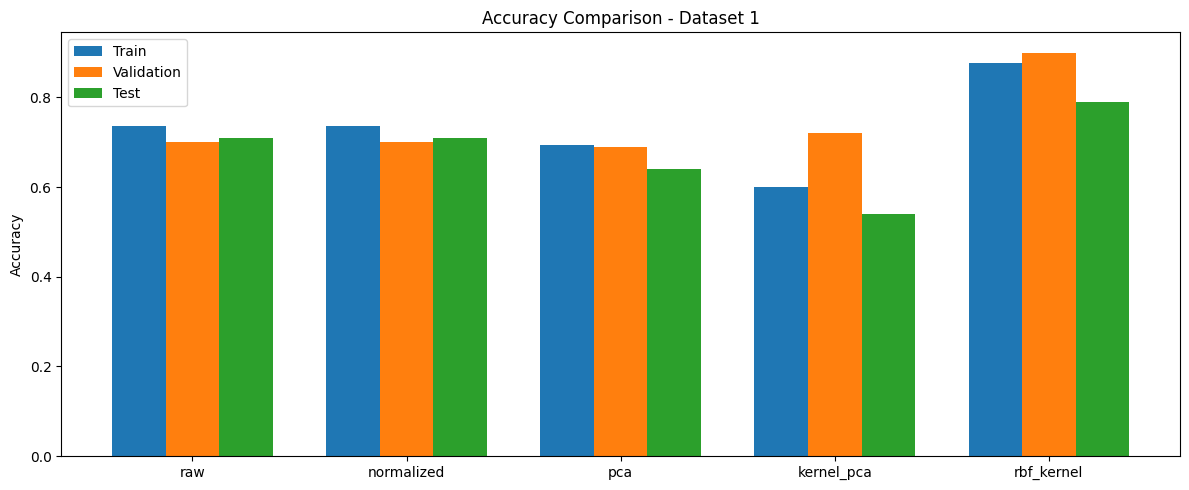

,raw,normalized,pca,kernel_pca,rbf_kernel
train,0.736667,0.736667,0.693333,0.600000,0.876667
val,0.700000,0.700000,0.690000,0.720000,0.900000
test,0.710000,0.710000,0.640000,0.540000,0.790000


In [ ]:
run_pipeline_logistic(X, y, "Dataset 1")



-Firstly, it's worth noting that the accuracy values for the Decision Tree model are similar to those of the Logistic Regression model. This similarity was not observed before hyperparameter tuning.

-For both models, the RBF kernel consistently yielded the best results across training, validation, and test datasets.

-Standardizing the data had no significant effect.

-Interestingly, PCA, even when combined with the RBF kernel, demonstrated worse performance compared to using the raw or standardized data. This observation requires further investigation, especially considering that only 2 out of 5 features are informative, which would typically suggest improved performance with dimensionality reduction to 2.






Therefore, we propose simulating another dataset with 3 informative features to investigate whether the observed behavior is related to the number of informative features.

In [ ]:
def simulate_data_2():
    """
    Simulates a dataset with overlapping classes using make_classification.

    Returns:
        tuple: A tuple containing the feature matrix (X) and the target vector (y).
    """
    X, y = make_classification(n_samples=500, n_features=3, n_informative=2,
                               n_redundant=0, n_clusters_per_class=1,
                               class_sep=0.5, random_state=42)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.5)
    plt.title("Overlapping Classes_ Data 1")
    plt.show()

    return X, y

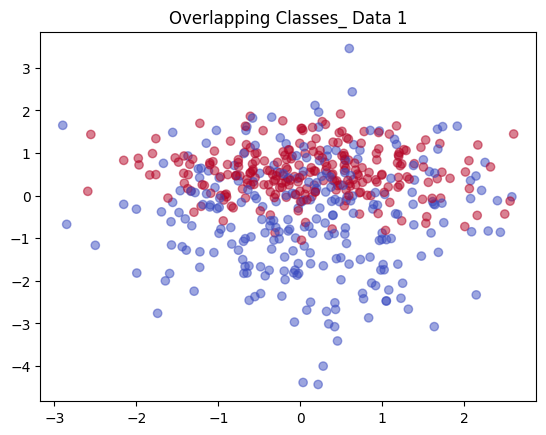

In [ ]:
X_2, y_2 = simulate_data_2()

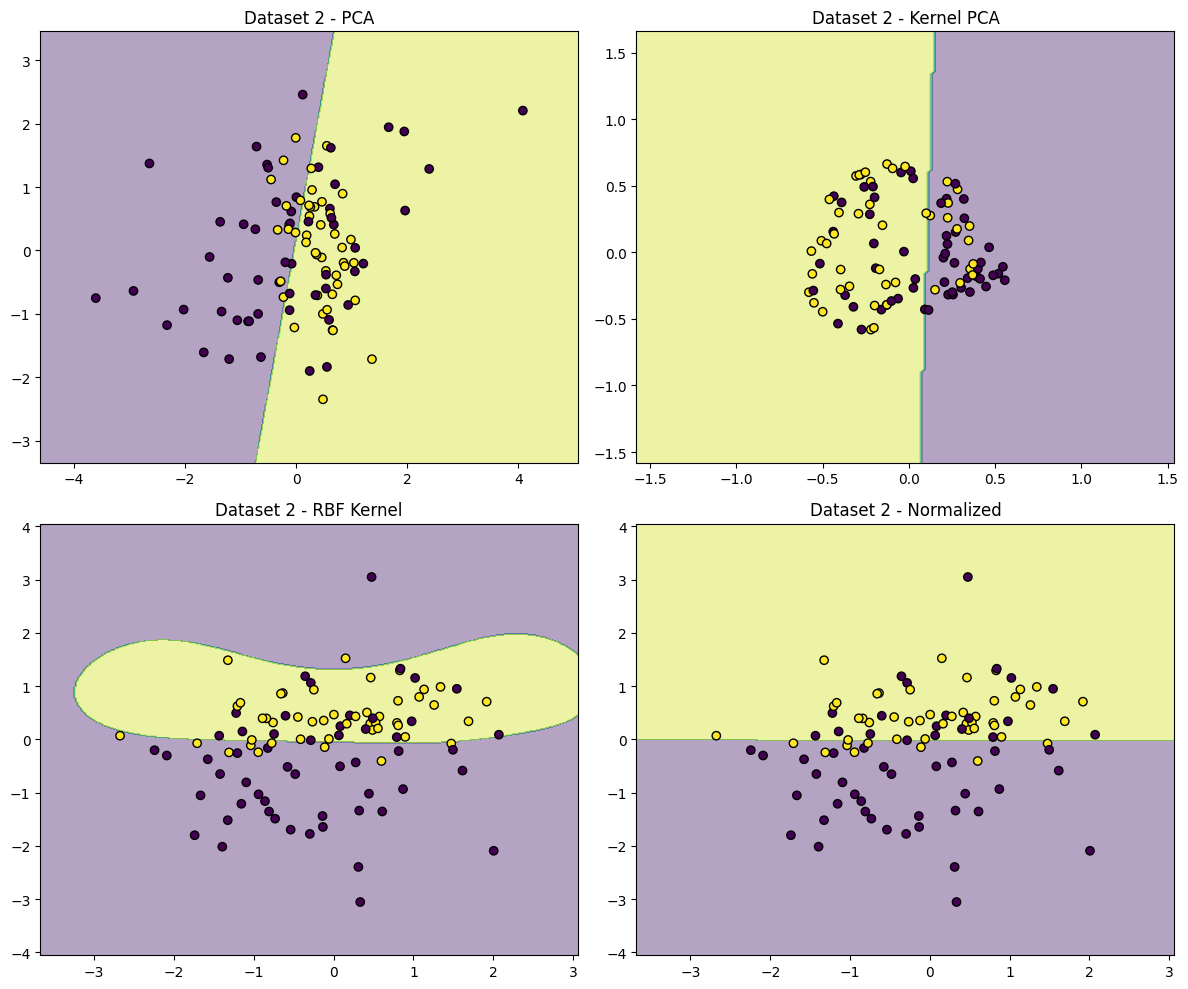

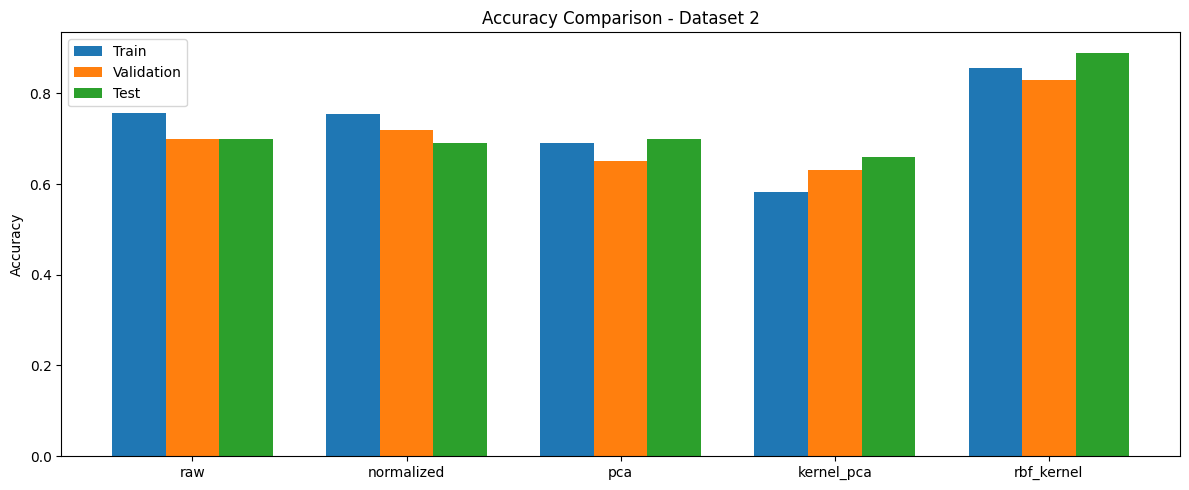

,raw,normalized,pca,kernel_pca,rbf_kernel
train,0.756667,0.753333,0.690000,0.583333,0.856667
val,0.700000,0.720000,0.650000,0.630000,0.830000
test,0.700000,0.690000,0.700000,0.660000,0.890000


In [ ]:
run_pipeline_logistic(X_2, y_2, "Dataset 2")

In [ ]:
def simulate_data_3():
    """
    Simulates a dataset with overlapping classes using make_classification.

    Returns:
        tuple: A tuple containing the feature matrix (X) and the target vector (y).
    """
    X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                               n_redundant=0, n_clusters_per_class=1,
                               class_sep=0.5, random_state=42)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.5)
    plt.title("Overlapping Classes_ Data 1")
    plt.show()

    return X, y

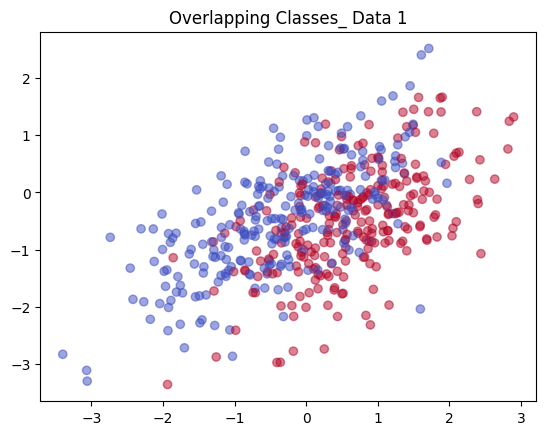

In [ ]:
X_3, y_3 = simulate_data_3()

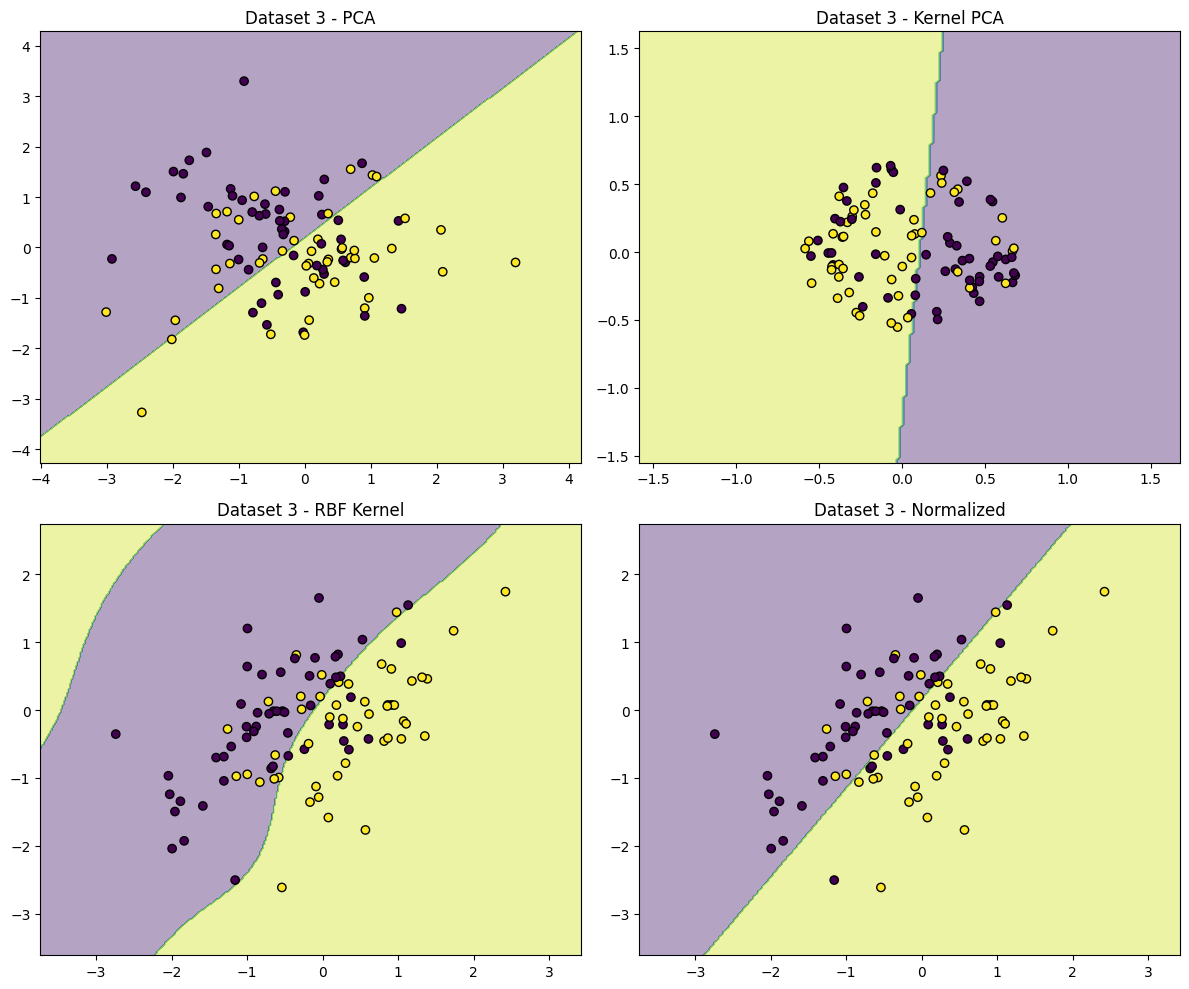

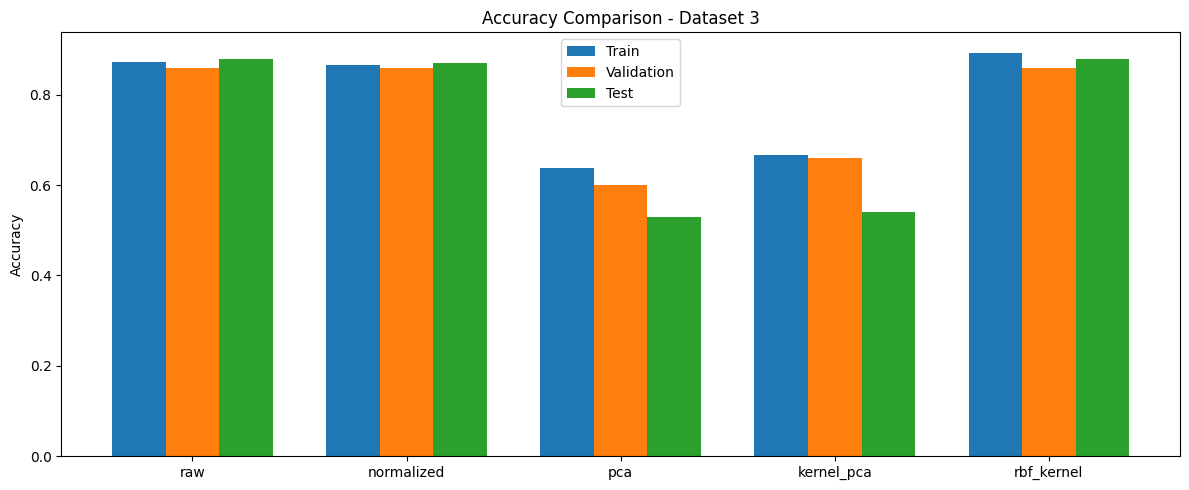

,raw,normalized,pca,kernel_pca,rbf_kernel
train,0.873333,0.866667,0.636667,0.666667,0.893333
val,0.860000,0.860000,0.600000,0.660000,0.860000
test,0.880000,0.870000,0.530000,0.540000,0.880000


In [ ]:
run_pipeline_logistic(X_3, y_3, "Dataset 3")

Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Hyperparameters: {'ccp_alpha': 0

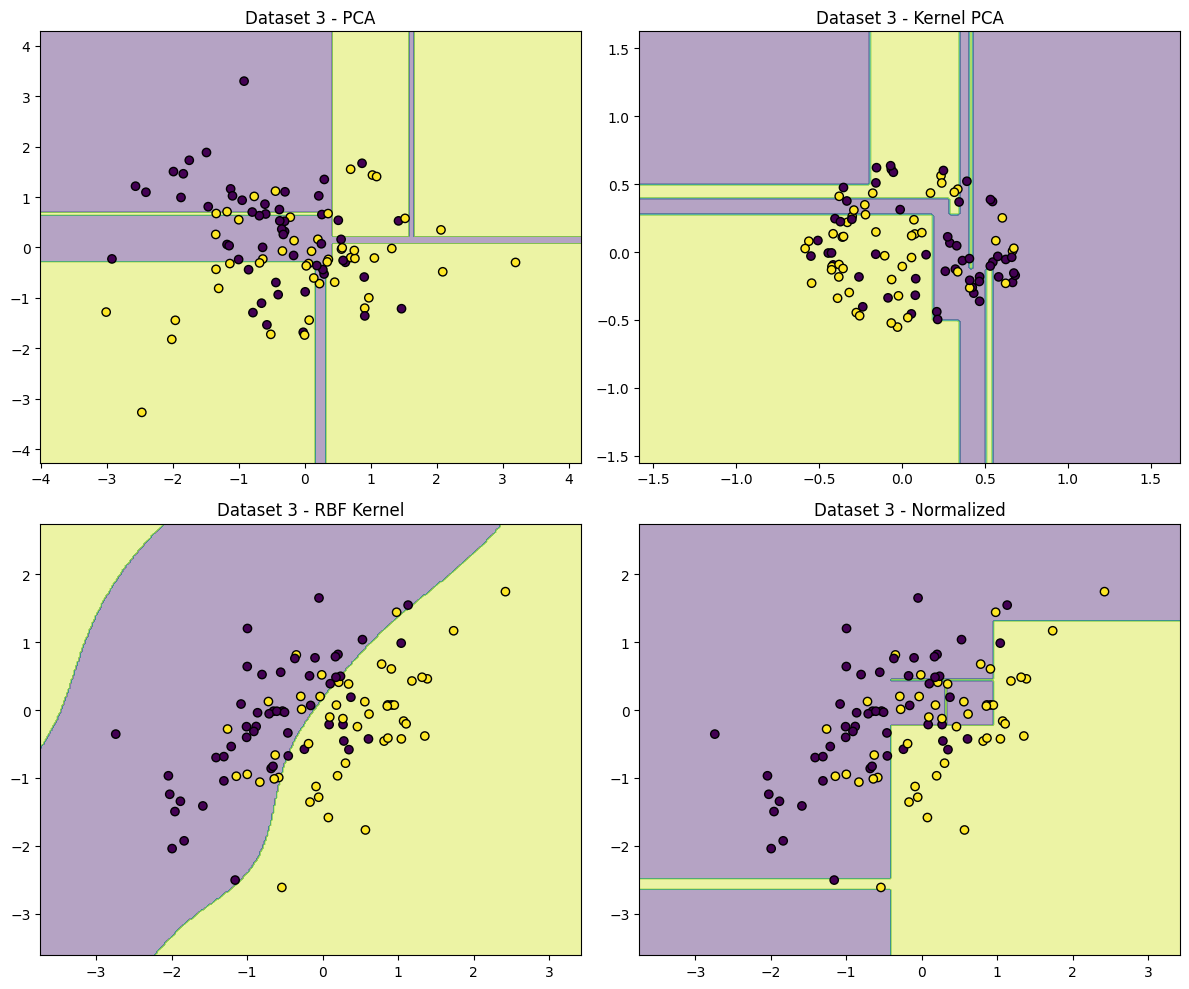

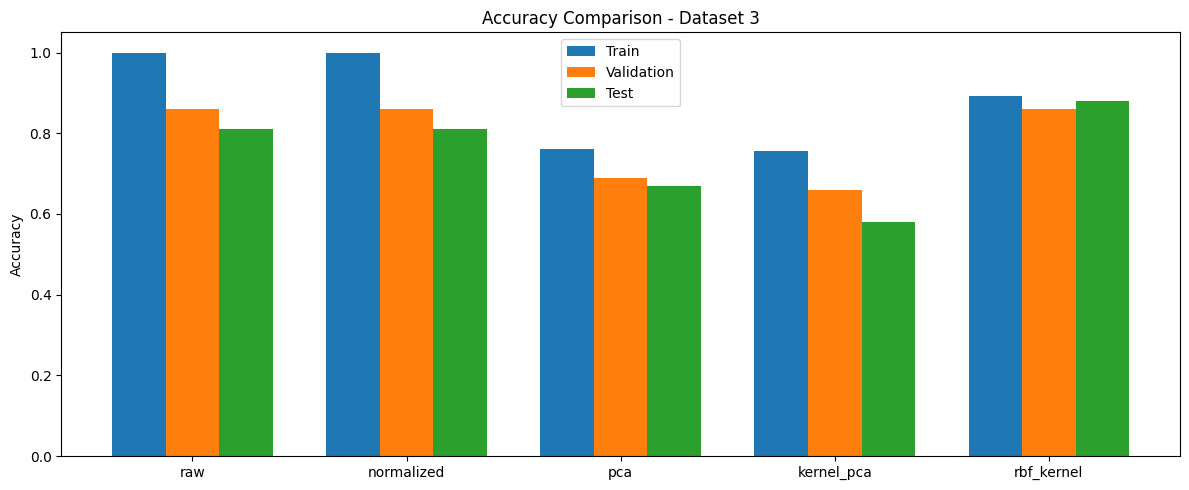

,raw,normalized,pca,kernel_pca,rbf_kernel
train,1.000000,1.000000,0.760000,0.756667,0.893333
val,0.860000,0.860000,0.690000,0.660000,0.860000
test,0.810000,0.810000,0.670000,0.580000,0.880000


In [ ]:
run_pipeline_tree(X_3, y_3, "Dataset 3")

We observe that even with increasing the percentage of informative features (data_1: 40%, data_2: 66%, data_3: 100%), the performance of PCA remains lower than using the RBF kernel or the raw data. Note that in these datasets, we used only 5 features, and reducing the dimensionality to 2 would not typically be detrimental.

However, let's investigate whether PCA will perform better when our data has a higher dimensionality.
We will utilize a dataset with 20 features, where 15 are informative. For PCA, we will retain 10 principal components.

In [ ]:
def simulate_data_4():
    """
    Simulates a dataset with overlapping classes using make_classification.

    Returns:
        tuple: A tuple containing the feature matrix (X) and the target vector (y).
    """
    X, y = make_classification(n_samples=500, n_features=20, n_informative=15,
                               n_redundant=0, n_clusters_per_class=1,
                               class_sep=0.5, random_state=42)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.5)
    plt.title("Overlapping Classes_ Data 1")
    plt.show()

    return X, y

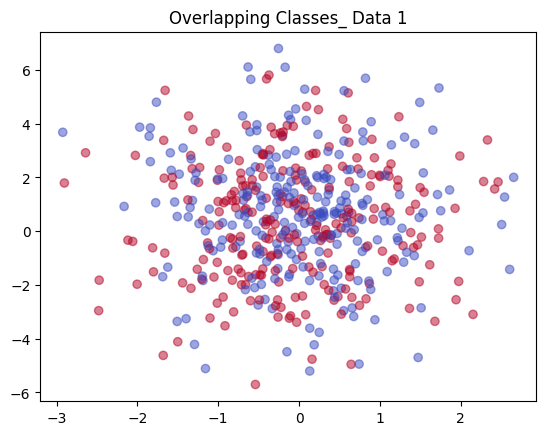

In [ ]:
X_4, y_4 = simulate_data_4()

In [ ]:


def run_pipeline_tree_10(X, y, dataset_name):

    """
    This function tunes and fits a Decision Tree classifier to the provided data using the function tune_and_fit_decision_tree ,
    applying it to each data transformation separately. It then evaluates the models
    performance using the accuracy score, visualizes the decision boundaries,
    and presents the accuracy scores for each transformation.

    """
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    results = {}

    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_val_norm = scaler.transform(X_val)
    X_test_norm = scaler.transform(X_test)

    # --- Raw Data ---
    clf_raw, params_raw = tune_and_fit_decision_tree(X_train, y_train, X_val, y_val)
    results["raw"] = {
        "train": accuracy_score(y_train, clf_raw.predict(X_train)),
        "val": accuracy_score(y_val, clf_raw.predict(X_val)),
        "test": accuracy_score(y_test, clf_raw.predict(X_test))
    }

    # --- Normalized Data ---
    clf_norm, params_norm = tune_and_fit_decision_tree(X_train_norm, y_train, X_val_norm, y_val)
    results["normalized"] = {
        "train": accuracy_score(y_train, clf_norm.predict(X_train_norm)),
        "val": accuracy_score(y_val, clf_norm.predict(X_val_norm)),
        "test": accuracy_score(y_test, clf_norm.predict(X_test_norm))
    }

    # --- PCA ---
    pca = PCA(n_components=10)
    X_train_pca = pca.fit_transform(X_train_norm)
    X_val_pca = pca.transform(X_val_norm)
    X_test_pca = pca.transform(X_test_norm)

    clf_pca, params_pca = tune_and_fit_decision_tree(X_train_pca, y_train, X_val_pca, y_val)
    results["pca"] = {
        "train": accuracy_score(y_train, clf_pca.predict(X_train_pca)),
        "val": accuracy_score(y_val, clf_pca.predict(X_val_pca)),
        "test": accuracy_score(y_test, clf_pca.predict(X_test_pca))
    }

    # --- Kernel PCA ---
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.5)
    X_train_kpca = kpca.fit_transform(X_train_norm)
    X_val_kpca = kpca.transform(X_val_norm)
    X_test_kpca = kpca.transform(X_test_norm)

    clf_kpca, params_kpca = tune_and_fit_decision_tree(X_train_kpca, y_train, X_val_kpca, y_val)
    results["kernel_pca"] = {
        "train": accuracy_score(y_train, clf_kpca.predict(X_train_kpca)),
        "val": accuracy_score(y_val, clf_kpca.predict(X_val_kpca)),
        "test": accuracy_score(y_test, clf_kpca.predict(X_test_kpca))
    }

    # --- RBF Kernel
    clf_rbf = SVC(kernel='rbf', gamma=0.5)
    clf_rbf.fit(X_train_norm, y_train)
    results["rbf_kernel"] = {
        "train": accuracy_score(y_train, clf_rbf.predict(X_train_norm)),
        "val": accuracy_score(y_val, clf_rbf.predict(X_val_norm)),
        "test": accuracy_score(y_test, clf_rbf.predict(X_test_norm))
    }

    # --- Plot decision boundaries ---
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plot_decision_boundary(X_val_pca, y_val, clf_pca, axs[0, 0], f"{dataset_name} - PCA")
    plot_decision_boundary(X_val_kpca, y_val, clf_kpca, axs[0, 1], f"{dataset_name} - Kernel PCA")
    plot_decision_boundary(X_val_norm, y_val, clf_rbf, axs[1, 0], f"{dataset_name} - RBF Kernel")
    plot_decision_boundary(X_val_norm, y_val, clf_norm, axs[1, 1], f"{dataset_name} - Normalized")
    plt.tight_layout()
    plt.show()

    # --- Plot accuracies ---
    methods = list(results.keys())
    train_scores = [results[m]["train"] for m in methods]
    val_scores = [results[m]["val"] for m in methods]
    test_scores = [results[m]["test"] for m in methods]

    x = np.arange(len(methods))
    width = 0.25
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x - width, train_scores, width, label="Train")
    ax.bar(x, val_scores, width, label="Validation")
    ax.bar(x + width, test_scores, width, label="Test")
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Accuracy Comparison - {dataset_name}")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # --- Results table ---
    results_df = pd.DataFrame(results)
    styled_table = results_df.style.set_properties(**{
        'background-color': 'lightblue',
        'color': 'black',
        'border-color': 'black'
    })

    display(styled_table)





Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Hyperparameters: {'ccp_alpha'

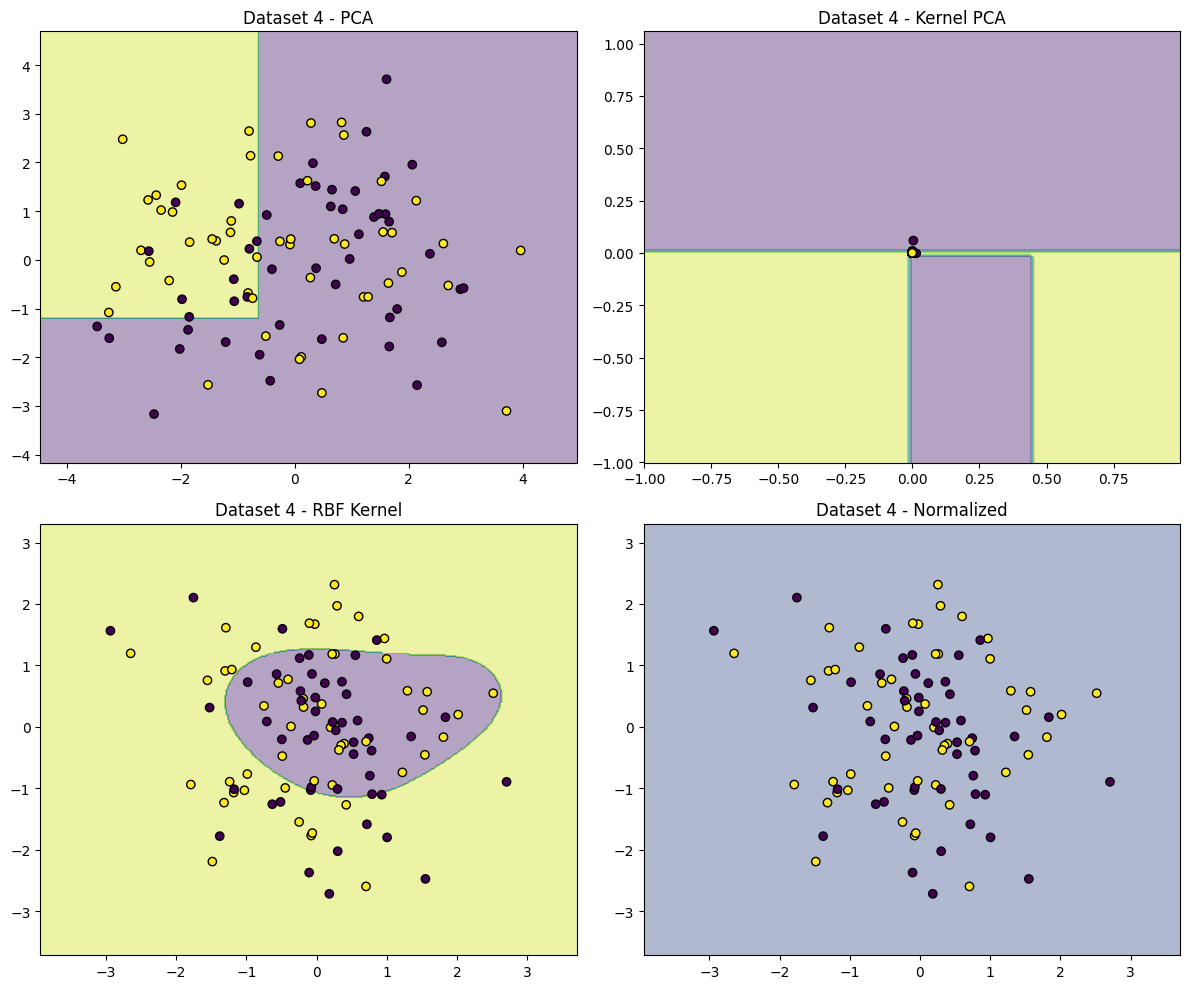

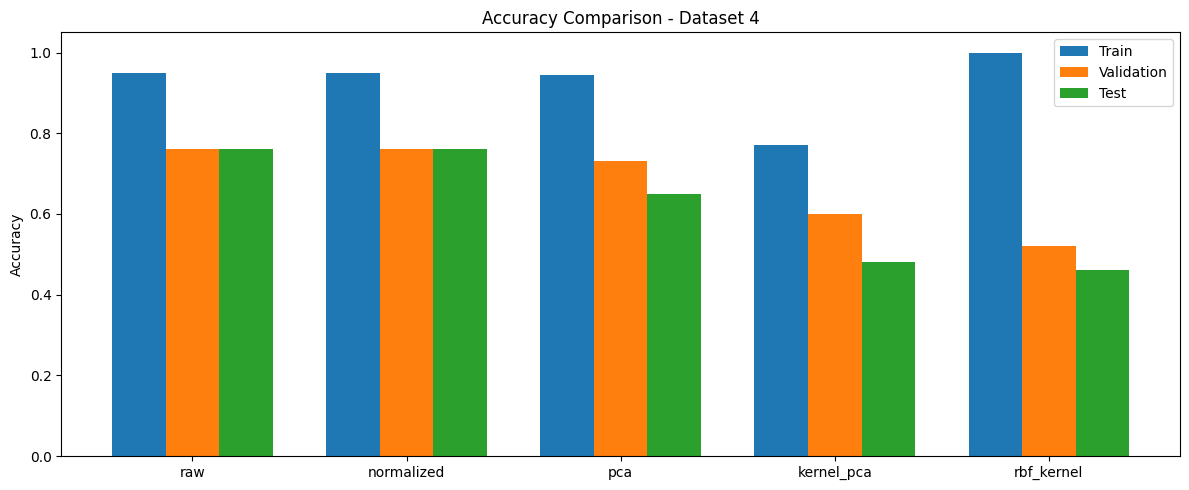

,raw,normalized,pca,kernel_pca,rbf_kernel
train,0.950000,0.950000,0.943333,0.770000,1.000000
val,0.760000,0.760000,0.730000,0.600000,0.520000
test,0.760000,0.760000,0.650000,0.480000,0.460000


In [ ]:
run_pipeline_tree_10(X_4, y_4, "Dataset 4")

In [ ]:

def run_pipeline_logistic_10(X, y, dataset_name):

    """
    This function tunes and fits a logistic regression classifier to the provided data,
    applying it to each data transformation separately. It then evaluates the models
    performance using the accuracy score, visualizes the decision boundaries,
    and presents the accuracy scores for each transformation.

    """
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    results = {}

    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_val_norm = scaler.transform(X_val)
    X_test_norm = scaler.transform(X_test)

    # Logistic Regression Hyperparameter tuning function
    def tune_logreg(X_train, y_train, X_val, y_val):
        param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}
        logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
        logreg.fit(X_train, y_train)
        best_logreg = logreg.best_estimator_

        return best_logreg

    # Raw
    clf_raw = tune_logreg(X_train, y_train, X_val, y_val)
    results["raw"] = {
        "train": accuracy_score(y_train, clf_raw.predict(X_train)),
        "val": accuracy_score(y_val, clf_raw.predict(X_val)),
        "test": accuracy_score(y_test, clf_raw.predict(X_test))
    }

    # Normalized
    clf_norm = tune_logreg(X_train_norm, y_train, X_val_norm, y_val)
    results["normalized"] = {
        "train": accuracy_score(y_train, clf_norm.predict(X_train_norm)),
        "val": accuracy_score(y_val, clf_norm.predict(X_val_norm)),
        "test": accuracy_score(y_test, clf_norm.predict(X_test_norm))
    }

    # PCA
    pca = PCA(n_components=10)
    X_train_pca = pca.fit_transform(X_train_norm)
    X_val_pca = pca.transform(X_val_norm)
    X_test_pca = pca.transform(X_test_norm)

    clf_pca = tune_logreg(X_train_pca, y_train, X_val_pca, y_val)
    results["pca"] = {
        "train": accuracy_score(y_train, clf_pca.predict(X_train_pca)),
        "val": accuracy_score(y_val, clf_pca.predict(X_val_pca)),
        "test": accuracy_score(y_test, clf_pca.predict(X_test_pca))
    }

    # Kernel PCA
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)
    X_train_kpca = kpca.fit_transform(X_train_norm)
    X_val_kpca = kpca.transform(X_val_norm)
    X_test_kpca = kpca.transform(X_test_norm)

    clf_kpca = tune_logreg(X_train_kpca, y_train, X_val_kpca, y_val)
    results["kernel_pca"] = {
        "train": accuracy_score(y_train, clf_kpca.predict(X_train_kpca)),
        "val": accuracy_score(y_val, clf_kpca.predict(X_val_kpca)),
        "test": accuracy_score(y_test, clf_kpca.predict(X_test_kpca))
    }

    # RBF Kernel SVM
    clf_rbf = SVC(kernel='rbf', gamma=0.5)
    clf_rbf.fit(X_train_norm, y_train)
    results["rbf_kernel"] = {
        "train": accuracy_score(y_train, clf_rbf.predict(X_train_norm)),
        "val": accuracy_score(y_val, clf_rbf.predict(X_val_norm)),
        "test": accuracy_score(y_test, clf_rbf.predict(X_test_norm))
    }


    # --- Plot decision boundaries ---
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plot_decision_boundary(X_val_pca, y_val, clf_pca, axs[0, 0], f"{dataset_name} - PCA")
    plot_decision_boundary(X_val_kpca, y_val, clf_kpca, axs[0, 1], f"{dataset_name} - Kernel PCA")
    plot_decision_boundary(X_val_norm, y_val, clf_rbf, axs[1, 0], f"{dataset_name} - RBF Kernel")
    plot_decision_boundary(X_val_norm, y_val, clf_norm, axs[1, 1], f"{dataset_name} - Normalized")
    plt.tight_layout()
    plt.show()

    # Plot accuracy scores
    methods = list(results.keys())
    train_scores = [results[m]["train"] for m in methods]
    val_scores = [results[m]["val"] for m in methods]
    test_scores = [results[m]["test"] for m in methods]

    x = np.arange(len(methods))
    width = 0.25
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x - width, train_scores, width, label="Train")
    ax.bar(x, val_scores, width, label="Validation")
    ax.bar(x + width, test_scores, width, label="Test")

    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Accuracy Comparison - {dataset_name}")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Create a pandas DataFrame from the results
    results_df = pd.DataFrame(results)

    # Apply styling
    styled_table = results_df.style.set_properties(**{
        'background-color': 'lightblue',
        'color': 'black',
        'border-color': 'black'
    })

    # Display the styled table
    display(styled_table)





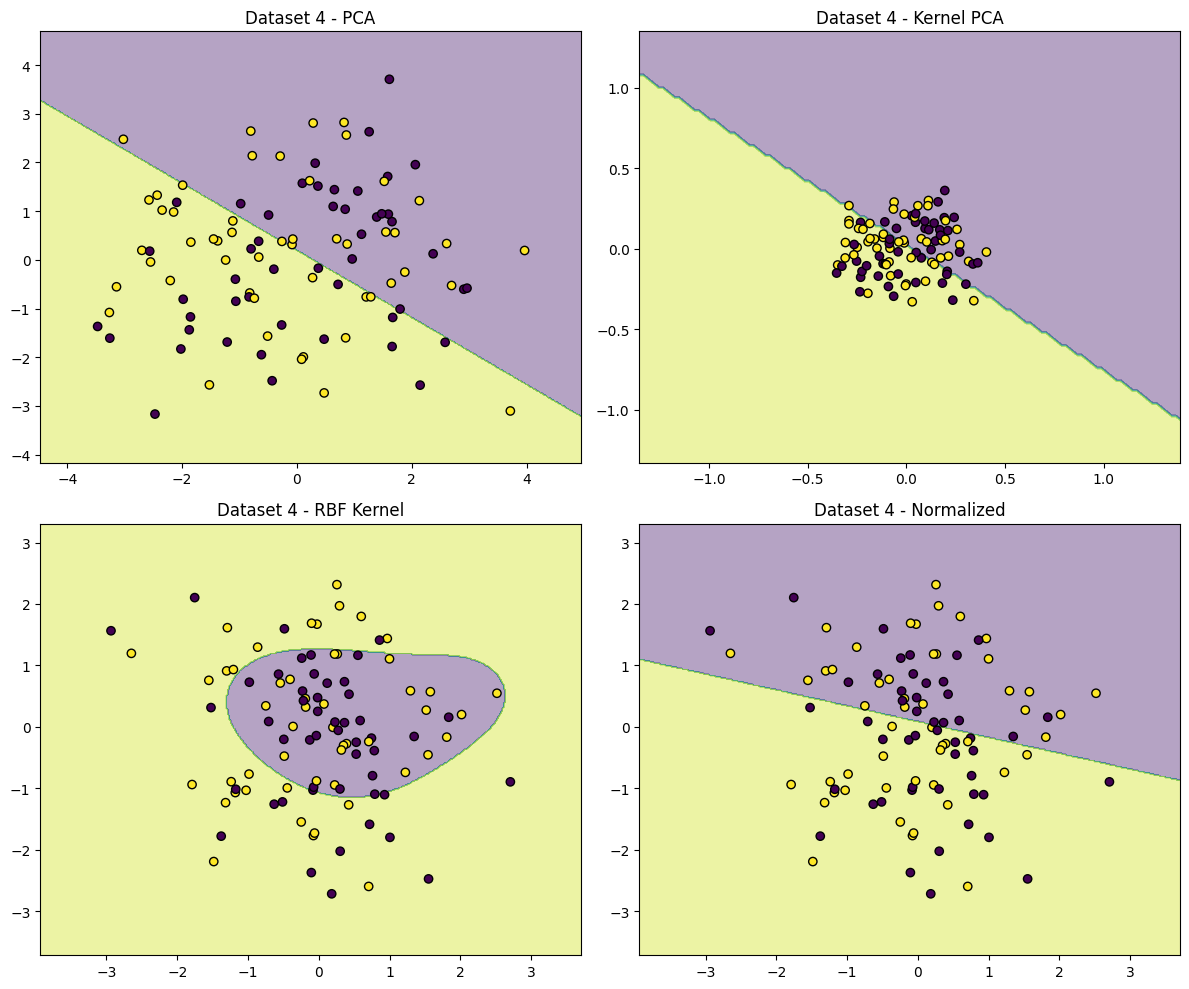

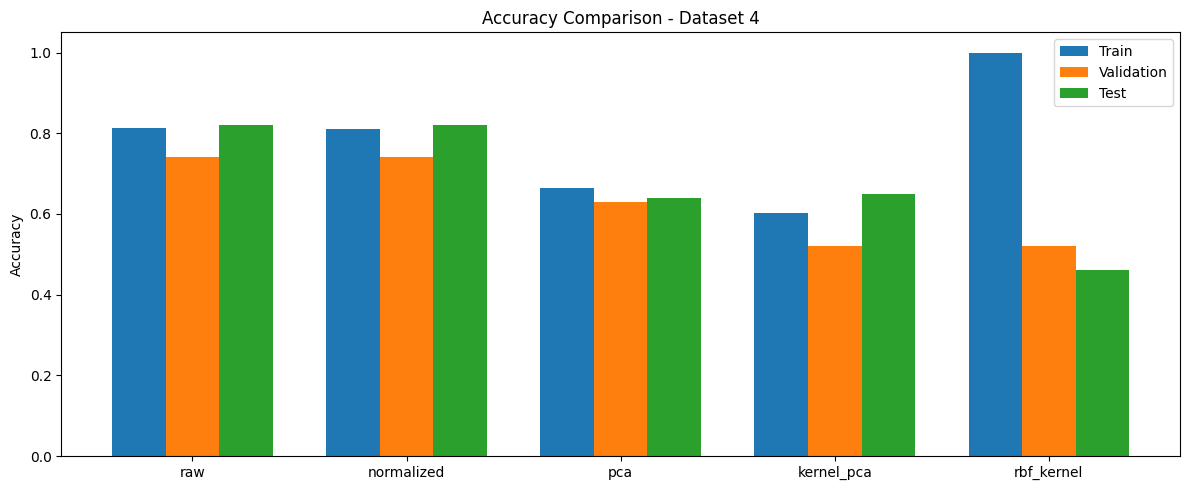

,raw,normalized,pca,kernel_pca,rbf_kernel
train,0.813333,0.810000,0.663333,0.603333,1.000000
val,0.740000,0.740000,0.630000,0.520000,0.520000
test,0.820000,0.820000,0.640000,0.650000,0.460000


In [ ]:
run_pipeline_logistic_10(X_4, y_4, "Dataset 4")

Interestingly, we observe that PCA performed slightly better or similarly to the raw data, suggesting that PCA is not always a detrimental choice. However, given that PCA is a computationally expensive operation and there isn't a significant difference in performance, it might not be a crucial step. Notably, PCA exhibited better performance on unseen data compared to the RBF kernel, which showed slight signs of overfitting.

Meanwhile, Kernel PCA demonstrated the worst performance, particularly on unseen data.


### potential explanation of results



KernelPCA is an unsupervised dimensionality reduction technique, meaning it does not take class labels into account during training. Instead of focusing on separating classes, it seeks directions in the transformed (kernel) feature space that maximize the variance of the data. As a result, when classes overlap significantly in those directions of high variance, KernelPCA may fail to distinguish them effectively. Similarly, PCA—which is also unsupervised and linear—suffers from the same limitation: it preserves global variance in the data without considering class structure. If the directions of maximum variance do not align with the axes that best separate the classes, PCA will also project overlapping classes close together, making classification difficult. Furthermore, although KernelPCA can capture nonlinear structures, overlapping classes often lack clear geometric separation, and both methods may project different classes into overlapping regions in the reduced space.

### Conclusion_2 :

RBF is a reliable solution when classes overlap, consistently demonstrating the best performance across the five tests. However, it might exhibit a slight tendency towards overfitting compared to other methods. Despite this, considering its overall performance, it remains the most effective approach.

Initially, keeping the data raw or standardizing it might be a good idea, as these are computationally inexpensive options. However, in this case, standardization yielded similar performance to using the raw data because the data was already scaled. This is particularly relevant for the Decision Tree model, which is based on feature thresholds rather than distances or slopes, making it less sensitive to scaling differences.

PCA and Kernel PCA are generally not the best choices when classes overlap, unless the features with higher variance happen to align with the axes that best separate the classes.

  ###  4-1- What is the dimension of Z space that works better?

Intuitively, we understand that classifying data in higher-dimensional spaces often becomes easier. However, it's valuable to write code that demonstrates the effectiveness of the RBF kernel, even when classes overlap, and to provide further insights into its performance

In the following section, we will compare the performance of four kernel transformations with 60% class overlap: linear, polynomial with degree 3, polynomial with degree 10, and RBF.

We will conduct the simulation twice: first, with fixed hyperparameters for the SVM using all kernels; second, allowing more flexibility for the RBF kernel to potentially make misclassifications

In [ ]:

def simulation_before_tuning():
    val_accuracy_list_kernel = []
    test_accuracy_list_kernel = []
    train_accuracy_list_kernel = []

    # Load data
    X, y = data_arrays['overlap_70']  # Make sure data_arrays is defined in the global scope

    # Step 1: Manual test split
    indices = np.arange(len(X))
    np.random.seed(42)
    np.random.shuffle(indices)

    test_size = int(0.1 * len(X))
    test_idx = indices[:test_size]
    modele_idx = indices[test_size:]

    X_test, y_test = X[test_idx], y[test_idx]
    X_modele, y_modele = X[modele_idx], y[modele_idx]

    # Step 2: Train/validation split
    X_train, X_val, y_train, y_val = train_test_split(
        X_modele, y_modele, test_size=0.2, random_state=42, stratify=y_modele
    )

    # Step 3: Train models
    models = {
        'Linear': SVC(kernel='linear', C=1),
        'Poly 3': SVC(kernel='poly', degree=3, C=1),
        'Poly 10': SVC(kernel='poly', degree=10, C=1),
        'RBF': SVC(kernel='rbf', gamma='scale', C=1)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)

        train_accuracy_list_kernel.append(accuracy_score(y_train, model.predict(X_train)))
        val_accuracy_list_kernel.append(accuracy_score(y_val, model.predict(X_val)))
        test_accuracy_list_kernel.append(accuracy_score(y_test, model.predict(X_test)))

    # Step 4: Plot
    kernels = list(models.keys())
    x_pos = np.arange(len(kernels))
    bar_width = 0.2

    plt.figure(figsize=(10, 6))
    plt.bar(x_pos, train_accuracy_list_kernel, width=bar_width, label='Train Accuracy')
    plt.bar(x_pos + bar_width, val_accuracy_list_kernel, width=bar_width, label='Validation Accuracy')
    plt.bar(x_pos + 2 * bar_width, test_accuracy_list_kernel, width=bar_width, label='Test Accuracy')

    plt.xticks(x_pos + bar_width, kernels)
    plt.xlabel('Kernels')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison for Different Kernels with 70% Overlap')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 5: Display table
    accuracy_df = pd.DataFrame({
        'Kernel': kernels,
        'Train Accuracy': train_accuracy_list_kernel,
        'Validation Accuracy': val_accuracy_list_kernel,
        'Test Accuracy': test_accuracy_list_kernel
    })

    print("\nAccuracy Table:")
    display(accuracy_df)



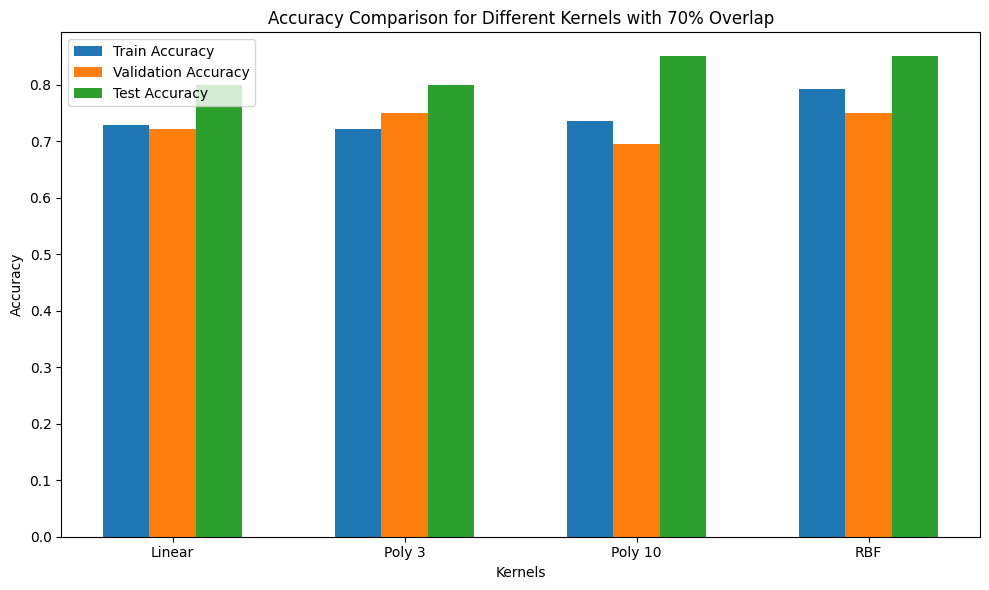


Accuracy Table:


,Kernel,Train Accuracy,Validation Accuracy,Test Accuracy
0,Linear,0.729167,0.722222,0.80
1,Poly 3,0.722222,0.750000,0.80
2,Poly 10,0.736111,0.694444,0.85
3,RBF,0.791667,0.750000,0.85


In [ ]:
simulation_before_tuning()

Oops, the polynomial kernel has better results than the RBF kernel in terms of test and validation accuracy!!!!

Wait, this seems to be an overfitting issue. Let's rerun the simulation with a regularized RBF kernel.

In [ ]:
def simulation_after_tuning() :

      val_accuracy_list_kernel = []
      test_accuracy_list_kernel =[]
      train_accuracy_list_kernel = []
      X, y = data_arrays[f'overlap_70']

      # Étape 1 : split manuel du test set (10%)
      indices = np.arange(len(X))
      np.random.seed(42)
      np.random.shuffle(indices)

      test_size = int(0.1 * len(X))
      test_idx = indices[:test_size]
      modele_idx = indices[test_size:]

      X_test, y_test = X[test_idx], y[test_idx]
      X_modele, y_modele = X[modele_idx], y[modele_idx]

      # Étape 2 : split modèle_set en train/val (80/20) ,
      X_train, X_val, y_train, y_val = train_test_split(X_modele, y_modele, test_size=0.2, random_state=42, stratify=y_modele)

      # Étape 3 :
      #** entraîner le modèle SVM, RBF
      model_rbf = SVC(kernel='rbf', gamma='scale', C=10)
      model_rbf.fit(X_train, y_train)

      #**: train the model, linear kernal :
      model_linear = SVC(kernel='linear', C=1)
      model_linear.fit(X_train, y_train)

      #** : train the model , degree 3 polynomial kernel
      model_poly3 = SVC(kernel='poly', degree=3, C=1)
      model_poly3.fit(X_train, y_train)

      #** : train the modele , degree 5 polynoial kernel
      model_poly5 = SVC(kernel='poly', degree=7, C=1)
      model_poly5.fit(X_train, y_train)



      # Étape 4 : évaluate modeles
      val_acc_rbf = accuracy_score(y_val, model_rbf.predict(X_val))
      test_acc_rbf = accuracy_score(y_test, model_rbf.predict(X_test))
      train_acc_rbf = accuracy_score(y_train, model_rbf.predict(X_train))
      val_acc_linear = accuracy_score(y_val, model_linear.predict(X_val))
      test_acc_linear = accuracy_score(y_test, model_linear.predict(X_test))
      train_acc_linear = accuracy_score(y_train, model_linear.predict(X_train))

      val_acc_poly3 = accuracy_score(y_val, model_poly3.predict(X_val))
      test_acc_poly3 = accuracy_score(y_test, model_poly3.predict(X_test))
      train_acc_poly3 = accuracy_score(y_train, model_poly3.predict(X_train))

      val_acc_poly5 = accuracy_score(y_val, model_poly5.predict(X_val))
      test_acc_poly5 = accuracy_score(y_test, model_poly5.predict(X_test))
      train_acc_poly5= accuracy_score(y_train, model_poly5.predict(X_train))



      val_accuracy_list_kernel.append(val_acc_linear)
      test_accuracy_list_kernel.append(test_acc_linear)
      train_accuracy_list_kernel.append(train_acc_linear)

      val_accuracy_list_kernel.append(val_acc_poly3)
      test_accuracy_list_kernel.append(test_acc_poly3)
      train_accuracy_list_kernel.append(train_acc_poly3)

      val_accuracy_list_kernel.append(val_acc_poly5)
      test_accuracy_list_kernel.append(test_acc_poly5)
      train_accuracy_list_kernel.append(train_acc_poly5)

      val_accuracy_list_kernel.append(val_acc_rbf)
      test_accuracy_list_kernel.append(test_acc_rbf)
      train_accuracy_list_kernel.append(train_acc_rbf)

      # Define the kernels and accuracy values
      kernels = ['Linear', 'Poly 3', 'Poly 10', 'RBF']
      x_pos = range(len(kernels))

      # Replace these lists with your actual accuracy values
      train_accuracy = train_accuracy_list_kernel
      val_accuracy = val_accuracy_list_kernel
      test_accuracy = test_accuracy_list_kernel

      # Create a DataFrame for tabular visualization
      accuracy_df = pd.DataFrame({
          'Kernel': kernels,
          'Train Accuracy': train_accuracy,
          'Validation Accuracy': val_accuracy,
          'Test Accuracy': test_accuracy
      })

      # Plot the bar chart
      plt.figure(figsize=(10, 6))
      bar_width = 0.2

      plt.bar(x_pos, train_accuracy, width=bar_width, label='Train Accuracy')
      plt.bar([x + bar_width for x in x_pos], val_accuracy, width=bar_width, label='Validation Accuracy')
      plt.bar([x + 2 * bar_width for x in x_pos], test_accuracy, width=bar_width, label='Test Accuracy')

      plt.xticks([x + bar_width for x in x_pos], kernels)
      plt.xlabel('Kernels')
      plt.ylabel('Accuracy')
      plt.title('Accuracy Comparison for Different Kernels with 60% Overlap')
      plt.legend()
      plt.tight_layout()
      plt.show()

      # Display the table
      print("\nAccuracy Table:")
      display(accuracy_df.style.set_caption("Accuracy per Kernel").set_table_styles(
          [{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '14px'), ('text-align', 'center')]}]
      ).set_properties(**{'background-color': '#f0f8ff', 'color': 'black', 'border-color': 'black'}))


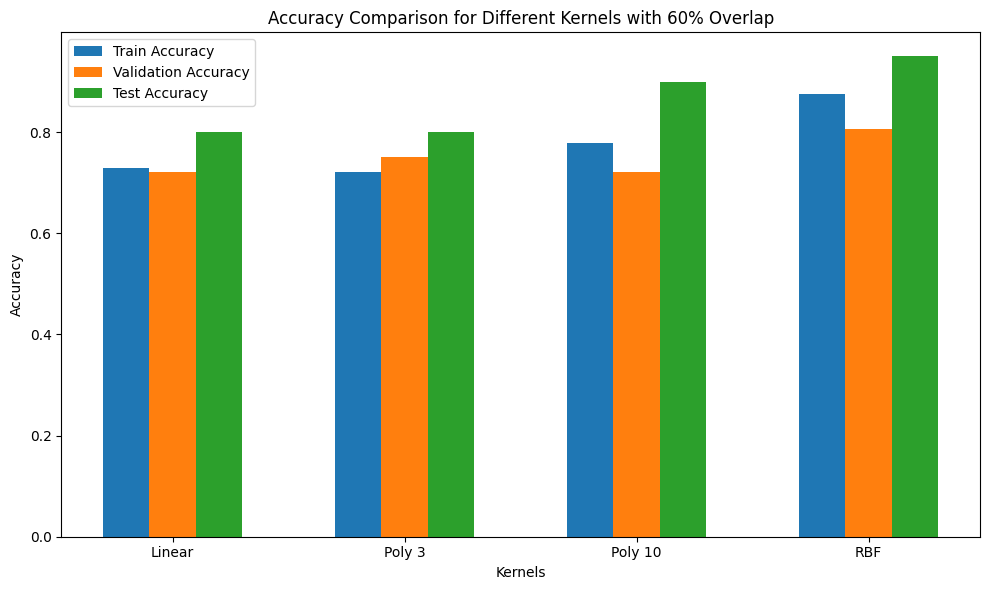


Accuracy Table:


,Kernel,Train Accuracy,Validation Accuracy,Test Accuracy
0,Linear,0.729167,0.722222,0.800000
1,Poly 3,0.722222,0.750000,0.800000
2,Poly 10,0.777778,0.722222,0.900000
3,RBF,0.875000,0.805556,0.950000


In [ ]:
simulation_after_tuning()

Congratulations, what you know is correct: the RBF kernel demonstrates better performance, but careful hyperparameter tuning is crucial to mitigate its tendency to overfit. As you can see, a small change in the value of C led to improved performance.

## 5- Conclusion

Class overlap reduces the ability of models to effectively classify classes, whether using linear or non-linear methods. One of the most effective transformations for handling this issue is the RBF kernel, which is why SVM with the RBF kernel is a popular choice. Although class overlap can still make classification challenging, SVM with RBF kernel has demonstrated better results compared to other transformations.

PCA and Kernel PCA, on the other hand, are generally not the best choices when classes overlap, unless the features with higher variance align with the axes that best separate the classes.

There was no significant difference in the results between standardizing the data and using it in its raw form.